## Rainfall Prediction 

### Data Description

- This dataset contains daily weather observations from numerous Australian weather stations. Weather forecasting is the application of science and technology to predict the conditions of the atmosphere for a given location and time. Weather forecasts are made by collecting quantitative data about the current state of the atmosphere at a given place and using meteorology to project how the atmosphere will change.

### Objective

- Our goal is to predict the probability of Rainfall based on the features at hand. The dataset is ordered by date, in an ascending order.The dataset has been obtained from the Australian Bureau of Meteorology. We have added an extra column to the existing dataset called 'Rain Tomorrow' and 'Rainfall'  which are the target variables.

### Importing the libraries

In [36]:
import numpy as np  
import pandas as pd  # to handle data in form of rows and columns   
import matplotlib.pyplot as plt   # importing ploting libraries
import matplotlib.style
from matplotlib import pyplot
%matplotlib inline   
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns

### Importing the Dataset

In [37]:
# reading the CSV file into pandas dataframe
df=pd.read_csv(r'C:\Users\Dell\Documents\rainfall.csv') 

In [38]:
df.head()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0           W           44.0          W  ...        71.0         22.0   
1         WNW           44.0        NNW  ...        44.0         25.0   
2         WSW           46.0          W  ...        38.0         30.0   
3          NE           24.0         SE  ...        45.0         16.0   
4           W           41.0        ENE  ...        82.0         33.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1007.7       1007.1       8.0       NaN     16.9     21.8         No   
1       1010.6       1007.8       NaN       NaN     17.2     24.3         No   
2       1007.6       1008.7       NaN       2.0     21.0     23.2         No   
3       1017.6       1012.8       NaN       NaN     18.1     26.5         No   
4       1010.8       1006.0       7.0       8.0     17.8     29.7         No   

   RainTomorrow  
0            No  
1            No  
2            No  
3            No  
4            No  

[5 rows x 23 columns]

In [39]:
df.tail()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
8420  2017-06-21    Uluru      2.8     23.4       0.0          NaN       NaN   
8421  2017-06-22    Uluru      3.6     25.3       0.0          NaN       NaN   
8422  2017-06-23    Uluru      5.4     26.9       0.0          NaN       NaN   
8423  2017-06-24    Uluru      7.8     27.0       0.0          NaN       NaN   
8424  2017-06-25    Uluru     14.9      NaN       0.0          NaN       NaN   

     WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
8420           E           31.0         SE  ...        51.0         24.0   
8421         NNW           22.0         SE  ...        56.0         21.0   
8422           N           37.0         SE  ...        53.0         24.0   
8423          SE           28.0        SSE  ...        51.0         24.0   
8424         NaN            NaN        ESE  ...        62.0         36.0   

      Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  \
8420       1024.6       1020.3       NaN       NaN     10.1     22.4   
8421       1023.5       1019.1       NaN       NaN     10.9     24.5   
8422       1021.0       1016.8       NaN       NaN     12.5     26.1   
8423       1019.4       1016.5       3.0       2.0     15.1     26.0   
8424       1020.2       1017.9       8.0       8.0     15.0     20.9   

      RainToday  RainTomorrow  
8420         No            No  
8421         No            No  
8422         No            No  
8423         No            No  
8424         No           NaN  

[5 rows x 23 columns]

In [40]:
df.shape

(8425, 23)

In [41]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

##### Description of the columns

- Date  - The date of observation
- Location  -The common name of the location of the weather station
- MinTemp  -The minimum temperature in degrees celsius
- MaxTemp -The maximum temperature in degrees celsius
- Rainfall  -The amount of rainfall recorded for the day in mm
- Evaporation  -The so-called Class A pan evaporation (mm) in the 24 hours to 9am
- Sunshine  -The number of hours of bright sunshine in the day.
- WindGustDir- The direction of the strongest wind gust in the 24 hours to midnight
- WindGustSpeed -The speed (km/h) of the strongest wind gust in the 24 hours to midnight
- WindDir9am -Direction of the wind at 9am
- WindDir3pm -Direction of the wind at 3pm
- WindSpeed9am -Wind speed (km/hr) averaged over 10 minutes prior to 9am
- WindSpeed3pm -Wind speed (km/hr) averaged over 10 minutes prior to 3pm
- Humidity9am -Humidity (percent) at 9am
- Humidity3pm -Humidity (percent) at 3pm
- Pressure9am -Atmospheric pressure (hpa) reduced to mean sea level at 9am
- Pressure3pm -Atmospheric pressure (hpa) reduced to mean sea level at 3pm
- Cloud9am - Fraction of sky obscured by cloud at 9am. 
- Cloud3pm -Fraction of sky obscured by cloud 
- Temp9am-Temperature (degrees C) at 9am
- Temp3pm -Temperature (degrees C) at 3pm
- RainToday -Boolean: 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0
- RainTomorrow -The amount of next day rain in mm. Used to create response variable . A kind of measure of the "risk".



### Exploratory Data Analysis

In [42]:
df.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

- We find that the target variable 'Rain Tomorrow' is object type, we need to predict if it rains tomorrrow or not. It indicates its a classification problem
- We also have to predict how much rainfall would be there, it is a regression problem

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

- From the above info, we find that there is null data in some of the columns.
- Using info, we get a short summary of rain prediction dataframe is made. It prints information about index dtype, column dtype, non null values and memory usage.

#### Checking for null values

In [44]:
df.isnull().sum()

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

In [45]:
df.isnull().sum()*100/len(df)

Date              0.000000
Location          0.000000
MinTemp           0.890208
MaxTemp           0.712166
Rainfall          2.848665
Evaporation      41.685460
Sunshine         47.406528
WindGustDir      11.762611
WindGustSpeed    11.762611
WindDir9am        9.839763
WindDir3pm        3.655786
WindSpeed9am      0.902077
WindSpeed3pm      1.270030
Humidity9am       0.700297
Humidity3pm       1.210682
Pressure9am      15.537092
Pressure3pm      15.572700
Cloud9am         28.735905
Cloud3pm         29.139466
Temp9am           0.664688
Temp3pm           1.139466
RainToday         2.848665
RainTomorrow      2.836795
dtype: float64

- We find that about 47% of the evaporation column has null data
- Evaporation, Sunshine, Cloud9am, and Cloud3pm are all missing more than 25% of their values
- Aside from Date and Location, all columns are missing at least some values
- These missing values can be handled by either dropping certain columns/rows, imputing the values, or a mix of both

In [46]:
df.describe()

MinTemp      MaxTemp     Rainfall  Evaporation     Sunshine  \
count  8350.000000  8365.000000  8185.000000  4913.000000  4431.000000   
mean     13.193305    23.859976     2.805913     5.389395     7.632205   
std       5.403596     6.136408    10.459379     5.044484     3.896235   
min      -2.000000     8.200000     0.000000     0.000000     0.000000   
25%       9.200000    19.300000     0.000000     2.600000     4.750000   
50%      13.300000    23.300000     0.000000     4.600000     8.700000   
75%      17.400000    28.000000     1.000000     7.000000    10.700000   
max      28.500000    45.500000   371.000000   145.000000    13.900000   

       WindGustSpeed  WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  \
count    7434.000000   8349.000000   8318.000000  8366.000000  8323.000000   
mean       40.174469     13.847646     18.533662    67.822496    51.249790   
std        14.665721     10.174579      9.766986    16.833283    18.423774   
min         7.000000      0.000000      0.000000    10.000000     6.000000   
25%        30.000000      6.000000     11.000000    56.000000    39.000000   
50%        39.000000     13.000000     19.000000    68.000000    51.000000   
75%        50.000000     20.000000     24.000000    80.000000    63.000000   
max       107.000000     63.000000     83.000000   100.000000    99.000000   

       Pressure9am  Pressure3pm     Cloud9am     Cloud3pm      Temp9am  \
count  7116.000000  7113.000000  6004.000000  5970.000000  8369.000000   
mean   1017.640233  1015.236075     4.566622     4.503183    17.762015   
std       6.828699     6.766681     2.877658     2.731659     5.627035   
min     989.800000   982.900000     0.000000     0.000000     1.900000   
25%    1013.000000  1010.400000     1.000000     2.000000    13.800000   
50%    1017.700000  1015.300000     5.000000     5.000000    17.800000   
75%    1022.300000  1019.800000     7.000000     7.000000    21.900000   
max    1039.000000  1036.000000     8.000000     8.000000    39.400000   

           Temp3pm  
count  8329.000000  
mean     22.442934  
std       5.980020  
min       7.300000  
25%      18.000000  
50%      21.900000  
75%      26.400000  
max      44.100000

- The total number of missing values of each column can be found below. The feature with the most missing values is 'Evaporation (mm)'.
- Before further proceeding with our analysis, we need to find an appropriate way to handle the missing data. Since the dataset is small, it is preferable to not remove the NAs but rather impute them.
- we observe that there are outliers in some of the columns. For instance, in the Rainfall column wesee that mean is 2.805mm and the maximum value is 371mm, which of course is way off the mean.

In [47]:
# categorical data:

cat_features = [column_name for column_name in df.columns if df[column_name].dtype == 'O']
print("Number of Categorical Features: {}".format(len(cat_features)))
print("Categorical Features: ",cat_features)

Number of Categorical Features: 7
Categorical Features:  ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [48]:
# numerical data:

num_features = [column_name for column_name in df.columns if df[column_name].dtype != 'O']
print("Number of Numerical Features: {}".format(len(num_features)))
print("Numerical Features: ",num_features)

Number of Numerical Features: 16
Numerical Features:  ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


In [49]:
#Handling missing data in categorical columns

# list of categorical features which has null values:
cat_features_with_null = [feature for feature in cat_features if df[feature].isnull().sum()]

- Filling the missing(Null) categorical features with most frequent value(mode)

In [50]:
# Filling the missing(Null) categorical features with most frequent value(mode)

for fea in cat_features_with_null:
    df[fea].fillna(df[fea].mode()[0],inplace=True)

In [51]:
#Handling missing data in numerical columns

# list of numerical Features with Null values:
num_features_with_null = [feature for feature in num_features if df[feature].isnull().sum()]

- Null values in Numerical Features can be imputed using Mean and Median.
- Mean is sensitive to outliers and median is immune to outliers. 
- If you want to impute the null values with mean values, then outliers in numerical features need to be addressed properly.

In [52]:
# Filling null values uisng mean: 

for fea in num_features_with_null:
    df[fea].fillna(df[fea].mean(),inplace=True)

In [53]:
df.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

- Now all the null values are removed from the dataset

#### Checking for duplicates

In [54]:
duplicate=df[df.duplicated()]
print('Duplicate Rows:')
duplicate

Duplicate Rows:


Date     Location  MinTemp  MaxTemp   Rainfall  Evaporation  \
3674  2015-10-20  Williamtown     13.1     31.6   0.000000     6.400000   
3675  2015-10-21  Williamtown     16.6     34.1   0.000000     6.600000   
3676  2015-10-22  Williamtown     17.5     26.3  19.800000     7.800000   
3677  2015-10-23  Williamtown     14.7     21.4   2.805913     5.389395   
3678  2015-10-24  Williamtown     11.0     22.5   2.805913     5.389395   
...          ...          ...      ...      ...        ...          ...   
6143  2012-01-25    Melbourne     20.3     25.0   0.000000    11.600000   
6144  2012-01-26    Melbourne     16.1     24.5   0.000000     4.400000   
6145  2012-01-27    Melbourne     16.6     30.7   2.805913     8.000000   
6146  2012-01-28    Melbourne     20.0     30.4   2.805913     8.200000   
6147  2012-01-29    Melbourne     20.5     34.9   2.805913     9.400000   

       Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  \
3674  11.100000           E           33.0          N  ...        67.0   
3675   9.900000         NNW           44.0         NW  ...        54.0   
3676   7.632205          SW           67.0          N  ...        94.0   
3677   7.632205           S           59.0        WSW  ...        90.0   
3678   7.632205           E           35.0         NW  ...        65.0   
...         ...         ...            ...        ...  ...         ...   
6143   7.300000           S           39.0          S  ...        77.0   
6144  12.400000           S           50.0          S  ...        67.0   
6145  13.000000         SSE           39.0        WSW  ...        69.0   
6146  12.100000         SSE           37.0         SW  ...        64.0   
6147   9.200000           N           59.0         NE  ...        68.0   

      Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
3674         37.0       1021.4       1016.4  1.000000  1.000000     21.5   
3675         39.0       1014.7       1010.6  1.000000  5.000000     24.7   
3676         45.0       1012.4       1008.3  8.000000  6.000000     18.6   
3677         48.0       1021.4       1020.9  7.000000  5.000000     15.6   
3678         60.0       1024.5       1021.4  4.566622  4.503183     18.4   
...           ...          ...          ...       ...       ...      ...   
6143         60.0       1015.2       1014.0  8.000000  2.000000     20.8   
6144         55.0       1018.5       1016.9  4.566622  4.503183     18.9   
6145         55.0       1016.9       1013.5  4.566622  4.503183     20.5   
6146         55.0       1012.7       1009.2  4.566622  4.503183     24.1   
6147         33.0       1007.1       1000.9  4.566622  4.503183     24.6   

      Temp3pm  RainToday  RainTomorrow  
3674     30.3         No            No  
3675     30.2         No           Yes  
3676     25.6        Yes            No  
3677     20.3         No            No  
3678     21.4         No           Yes  
...       ...        ...           ...  
6143     23.8         No            No  
6144     23.7         No            No  
6145     26.3         No            No  
6146     27.4         No            No  
6147     34.0         No           Yes  

[1663 rows x 23 columns]

In [55]:
df.duplicated().sum()

1663

- We find that there are 1663 duplicate rows. We need to drop them 

In [56]:
df=df.drop_duplicates()
df.shape

(6762, 23)

### Analysis of the body of distributions

- Let's visualize the distribution of continuous features

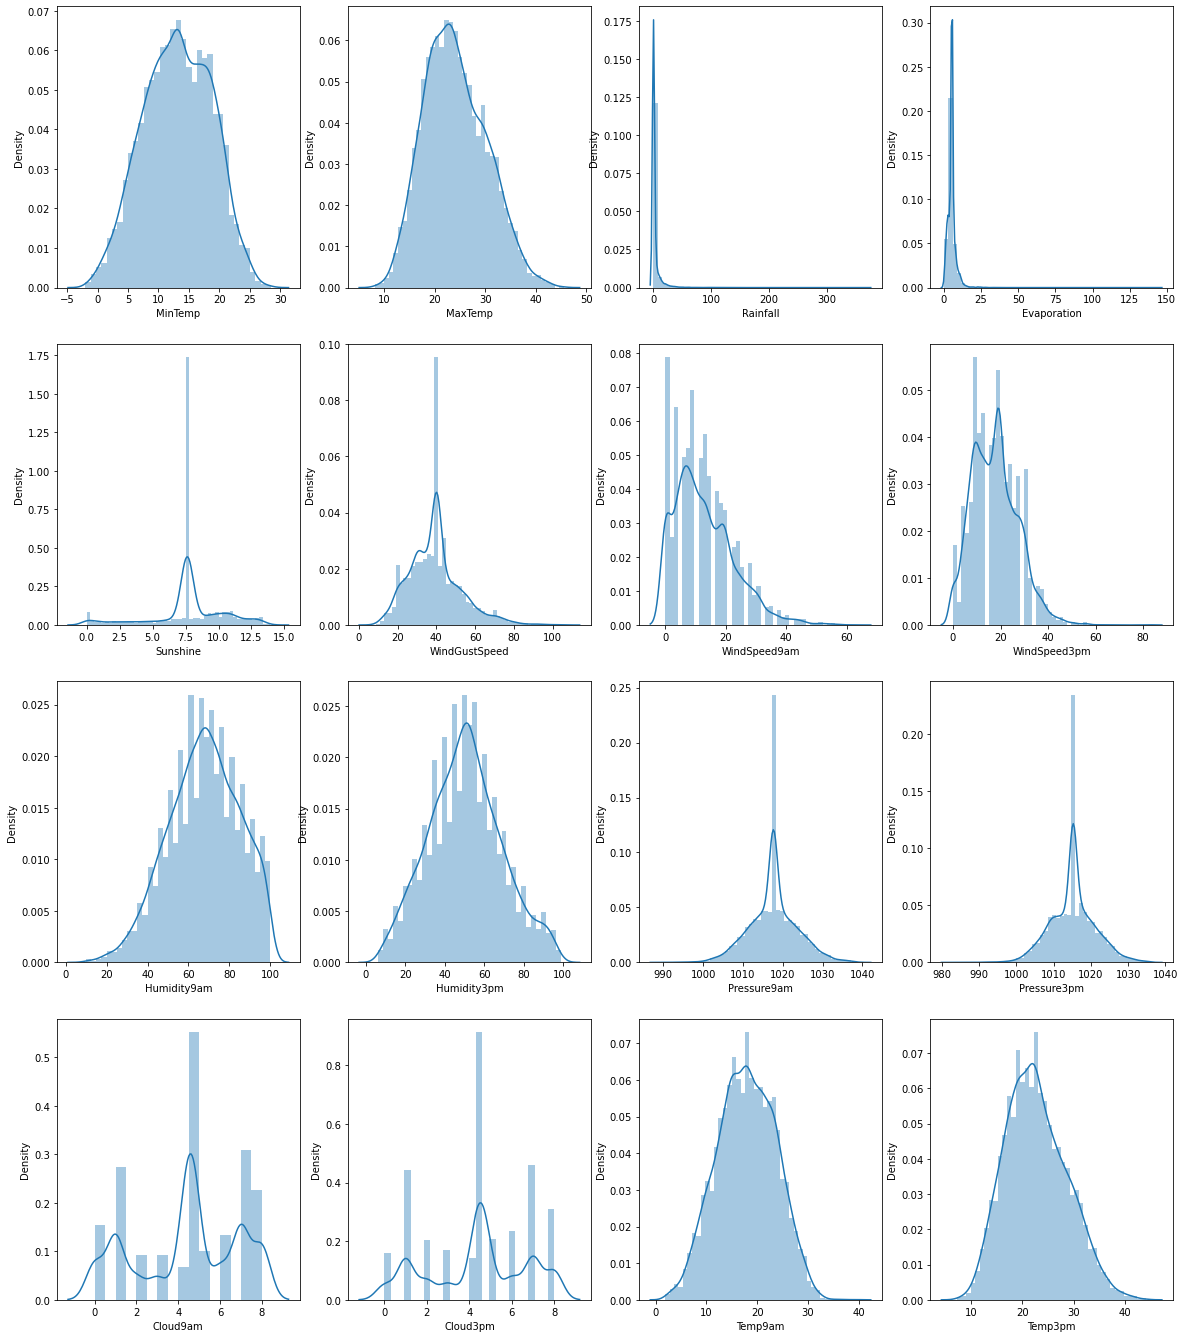

In [57]:
plt.figure(figsize= (20,30))  # Set the figure size
pos = 1    # a variable to manage the position of the subplot in the overall plot
for feature in num_features:   
    plt.subplot(5, 4, pos)   # plot grid
    sns.distplot(df[feature], kde= True ) #plotting distribution plot     
    pos += 1  # to plot over the grid one by one 

- 'MinTemp','MaxTemp','Humidity9am','Humidity3pm','Temp9am','Temp3pm' have fairly smooth ascension from min to max and the distribution is almost normal
- 'Rainfall' and 'Evaporation' are completely right skewed
- 'Windspeed9am','Windspeed3pm' have mixture of gaussians and distribution is slightly right skewed
- 'cloud9am','cloud3pm' have misture of almost 3 gaussian distributions

Let's explore the target variable

<AxesSubplot:xlabel='RainTomorrow', ylabel='count'>

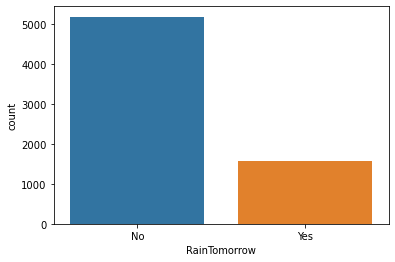

In [59]:
sns.countplot(data=df,x='RainTomorrow')

- From the above plot, it is clear that the data set is imbalanced

<AxesSubplot:xlabel='WindGustDir', ylabel='count'>

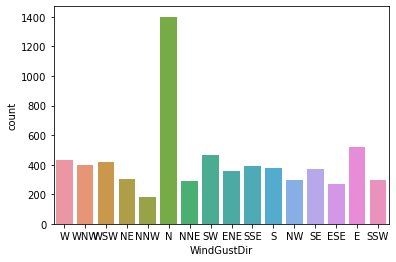

In [96]:
sns.countplot(data=df,x='WindGustDir')

<AxesSubplot:xlabel='WindDir9am', ylabel='count'>

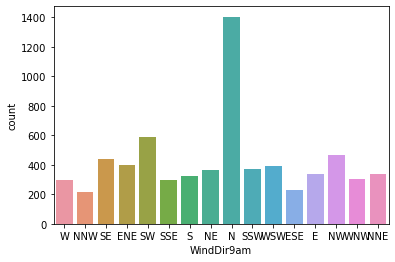

In [97]:
sns.countplot(data=df,x='WindDir9am')

<AxesSubplot:xlabel='WindDir3pm', ylabel='count'>

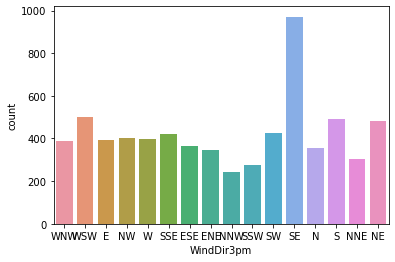

In [98]:
sns.countplot(data=df,x='WindDir3pm')

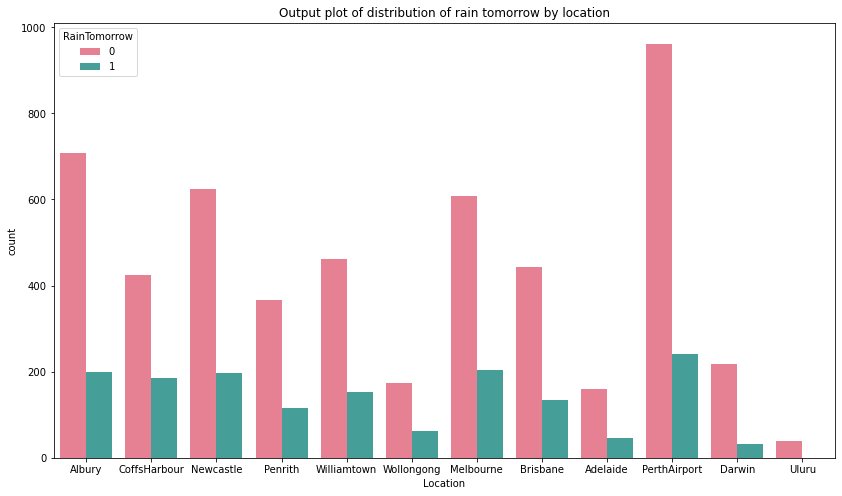

In [94]:
f, ax = plt.subplots(1, 1, figsize=(14,8))
ax=sns.countplot(x='Location',data=df,
              hue='RainTomorrow',palette="husl").set(title="Output plot of distribution of rain tomorrow by location")


- In uluru, as per our data, there is no chance of raining tomorrow
- In perthAirport there is higher chance that it won't rain


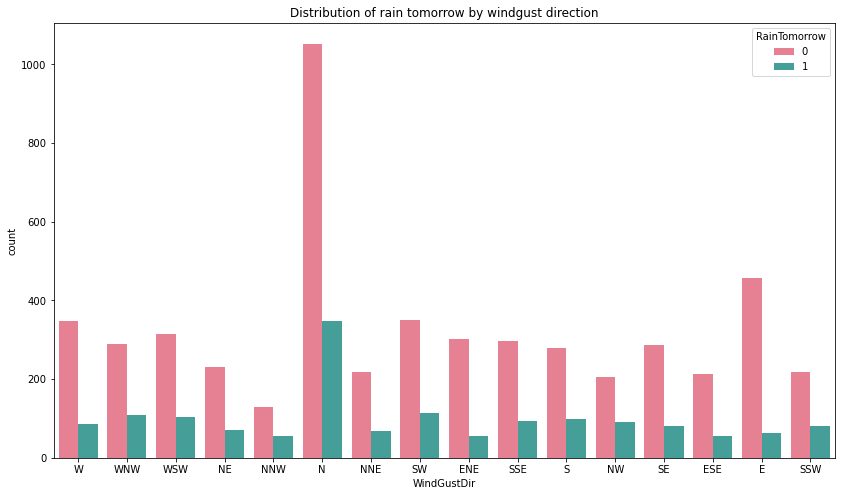

In [95]:
f, ax = plt.subplots(1, 1, figsize=(14,8))
ax=sns.countplot(x='WindGustDir',data=df,
              hue='RainTomorrow',palette="husl").set(title="Distribution of rain tomorrow by windgust direction")


- In the north direction, there are higher chances that it may or may not rain

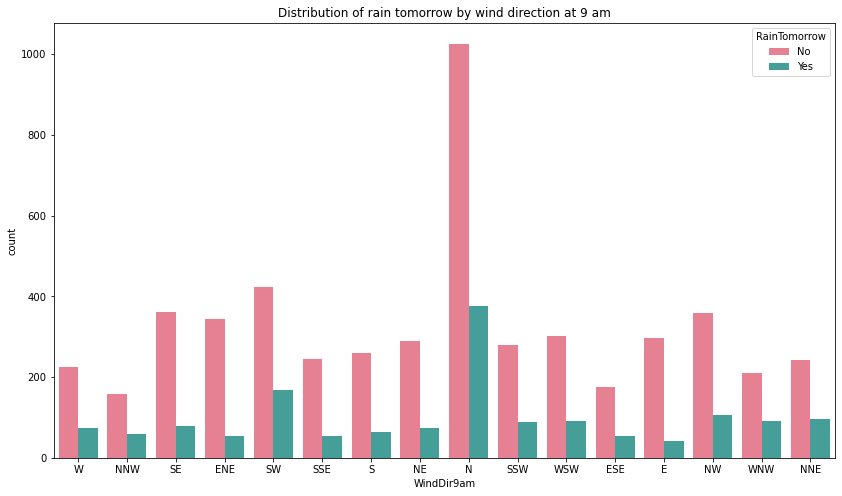

In [67]:
f, ax = plt.subplots(1, 1, figsize=(14,8))
ax=sns.countplot(x='WindDir9am',data=df,
              hue='RainTomorrow',palette="husl").set(title="Distribution of rain tomorrow by wind direction at 9 am")


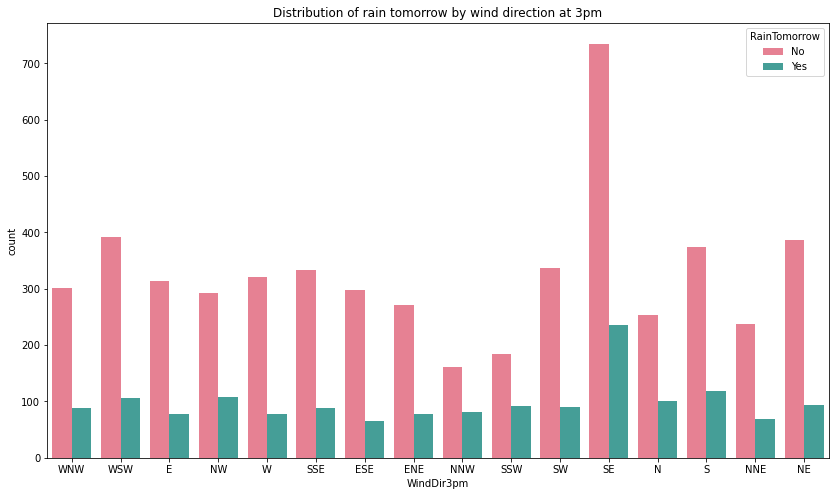

In [68]:
f, ax = plt.subplots(1, 1, figsize=(14,8))
ax=sns.countplot(x='WindDir3pm',data=df,
              hue='RainTomorrow',palette="husl").set(title="Distribution of rain tomorrow by wind direction at 3pm")


- In the south east direction, wind blows more.

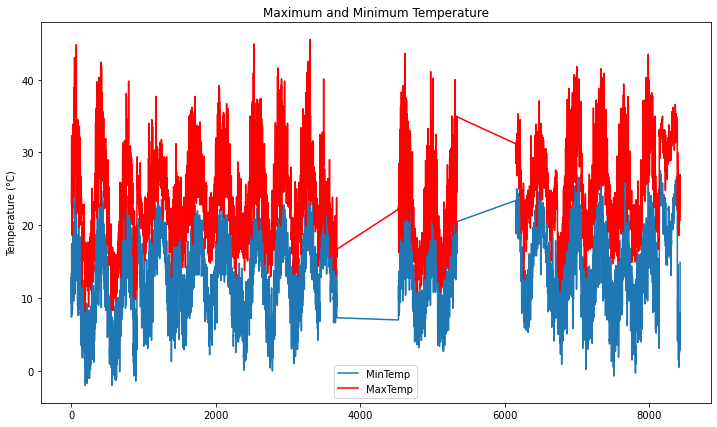

In [71]:
max_temp = df['MaxTemp']
min_temp = df['MinTemp']

min_temp.plot(figsize=(12,7), legend=True)
max_temp.plot(figsize=(12,7), color='r', legend=True)
plt.title('Maximum and Minimum Temperature')
plt.ylabel('Temperature (°C)')
plt.show()

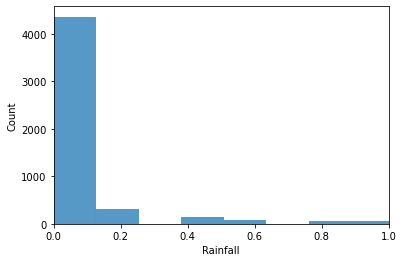

In [72]:
sns.histplot(df.Rainfall)
plt.xlim(0, 1);

In [85]:
df['RainToday'] = df['RainToday'].astype('str')
df['RainTomorrow'] = df['RainTomorrow'].astype('str')

In [86]:
# Encoding Categorical Features using replace function:

df['RainToday'].replace(to_replace = ['No','Yes'], value =[0,1], inplace=True)
df['RainTomorrow'].replace(to_replace = ['No','Yes'], value =[0,1], inplace=True)
df.head()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6     5.389395  7.632205   
1  2008-12-02   Albury      7.4     25.1       0.0     5.389395  7.632205   
2  2008-12-03   Albury     12.9     25.7       0.0     5.389395  7.632205   
3  2008-12-04   Albury      9.2     28.0       0.0     5.389395  7.632205   
4  2008-12-05   Albury     17.5     32.3       1.0     5.389395  7.632205   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0           W           44.0          W  ...        71.0         22.0   
1         WNW           44.0        NNW  ...        44.0         25.0   
2         WSW           46.0          W  ...        38.0         30.0   
3          NE           24.0         SE  ...        45.0         16.0   
4           W           41.0        ENE  ...        82.0         33.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1007.7       1007.1  8.000000  4.503183     16.9     21.8          0   
1       1010.6       1007.8  4.566622  4.503183     17.2     24.3          0   
2       1007.6       1008.7  4.566622  2.000000     21.0     23.2          0   
3       1017.6       1012.8  4.566622  4.503183     18.1     26.5          0   
4       1010.8       1006.0  7.000000  8.000000     17.8     29.7          0   

   RainTomorrow  
0             0  
1             0  
2             0  
3             0  
4             0  

[5 rows x 23 columns]

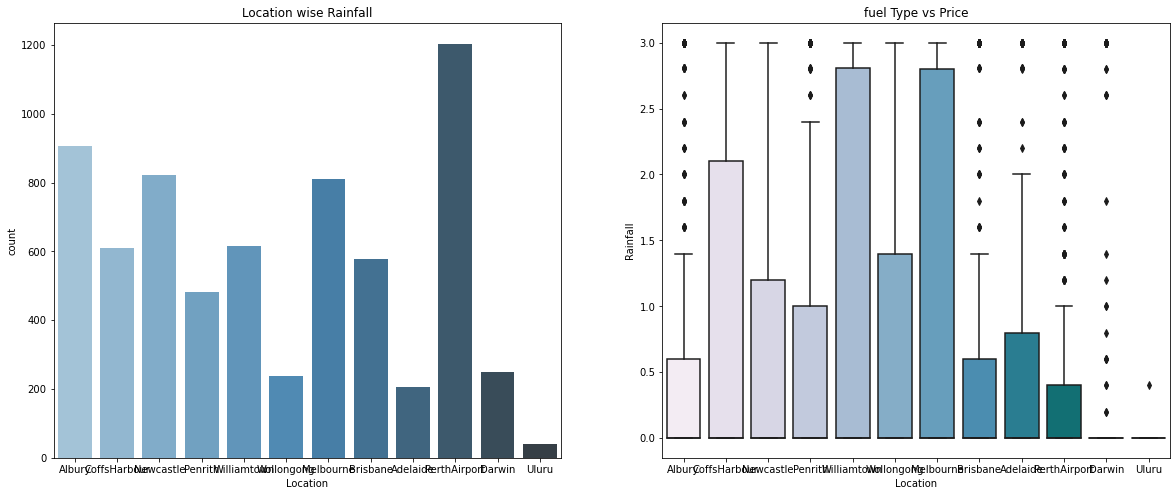

In [100]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Location wise Rainfall')
sns.countplot(df.Location, palette=("Blues_d"))

plt.subplot(1,2,2)
plt.title('Location vs Rainfall')
sns.boxplot(x=df.Location, y=df.Rainfall, palette=("PuBuGn"))
plt.show()

<Figure size 720x576 with 0 Axes>

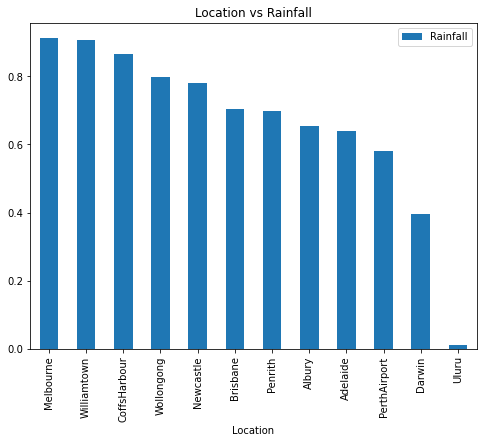

In [101]:
plt.figure(figsize=(10,8))

df1 = pd.DataFrame(df.groupby(['Location'])['Rainfall'].mean().sort_values(ascending = False))
df1.plot.bar(figsize=(8,6))
plt.title('Location vs Rainfall')
plt.show()


- In Melbourne, it has recorded highest rainfall.Next highest rainfall is recorded in Williamtown

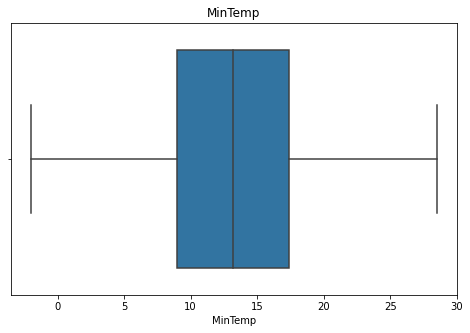

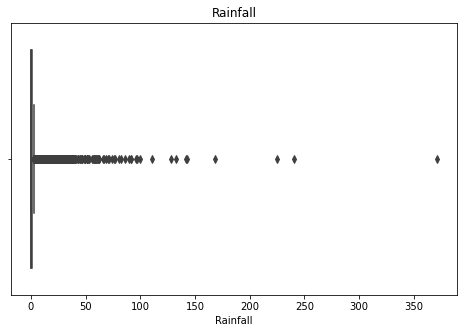

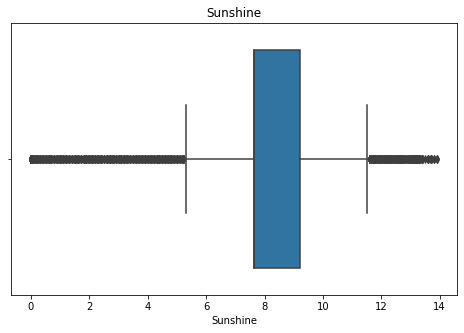

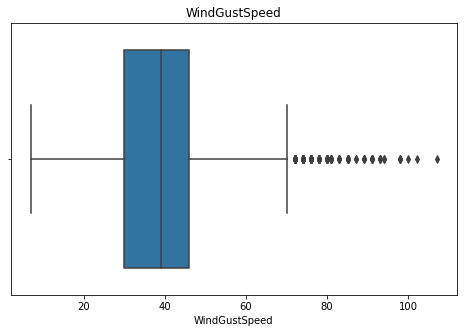

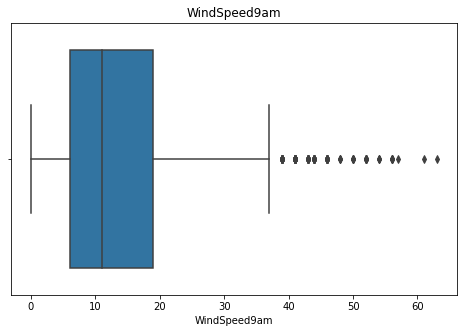

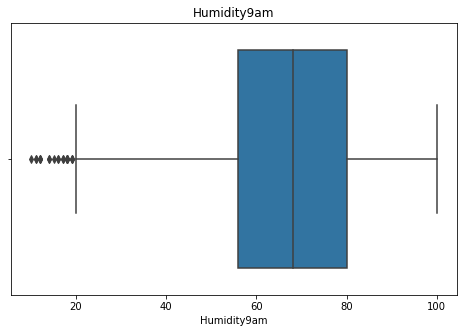

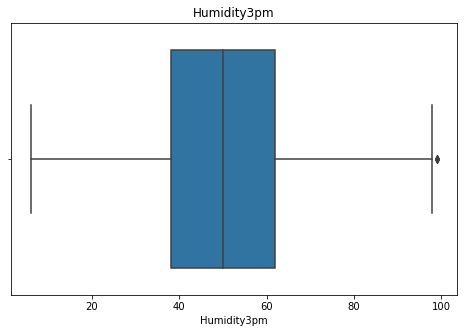

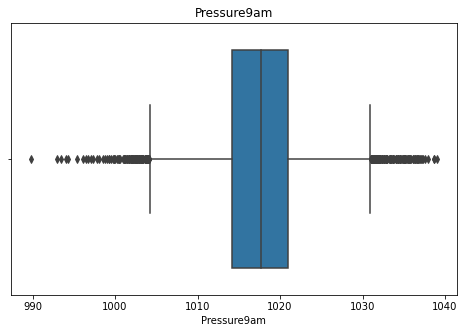

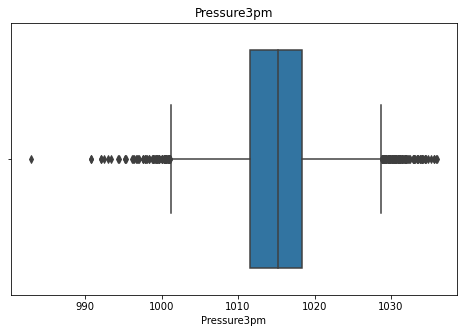

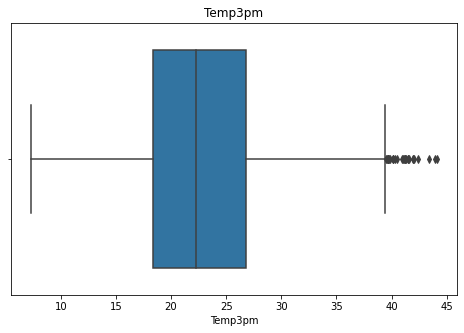

In [87]:
#checking for outliers using Box Plot:

for feature in num_features:
    plt.figure(figsize=(8,5))
    sns.boxplot(df[feature])
    plt.title(feature)
    


In [88]:
# features which has outliers:

features_with_outliers = ['MaxTemp', 'Rainfall', 'Evaporation','Sunshine', 'WindGustSpeed','WindSpeed9am', 'WindSpeed3pm',
                          'Humidity9am', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm']

In [89]:
# Replacing outliers using IQR:

for feature in features_with_outliers:
    q1 = df[feature].quantile(0.25)
    q3 = df[feature].quantile(0.75)
    IQR = q3-q1
    lower_limit = q1 - (IQR*1.5)
    upper_limit = q3 + (IQR*1.5)
    df.loc[df[feature]<lower_limit,feature] = lower_limit
    df.loc[df[feature]>upper_limit,feature] = upper_limit

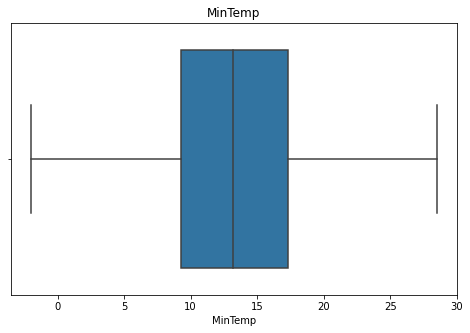

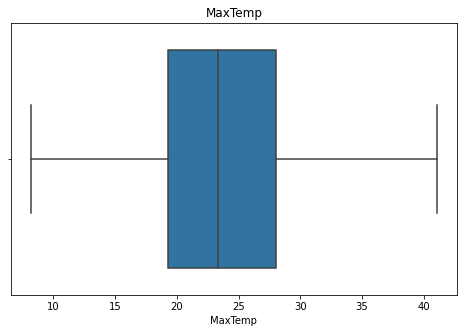

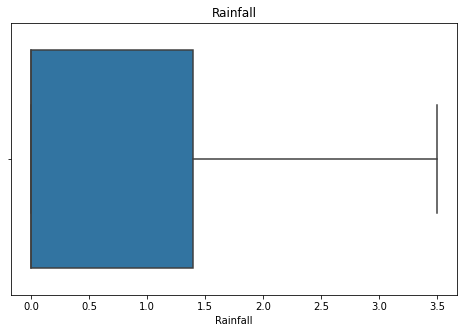

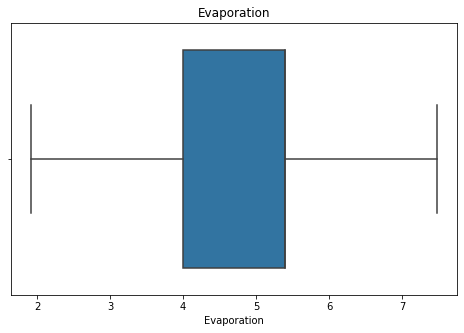

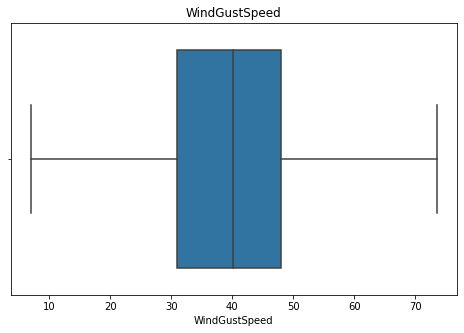

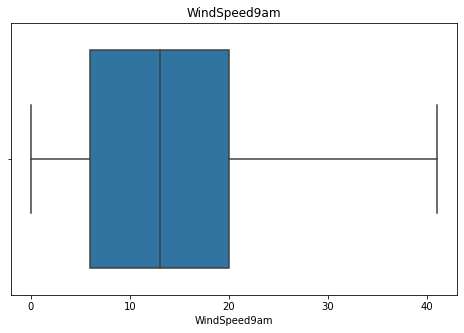

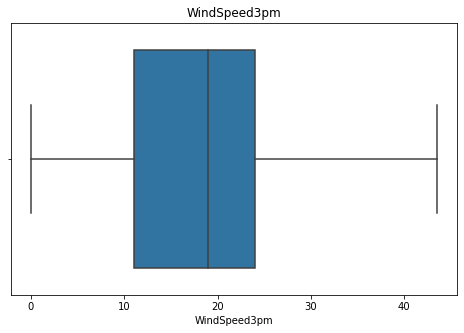

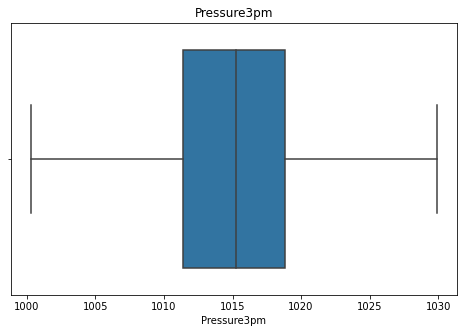

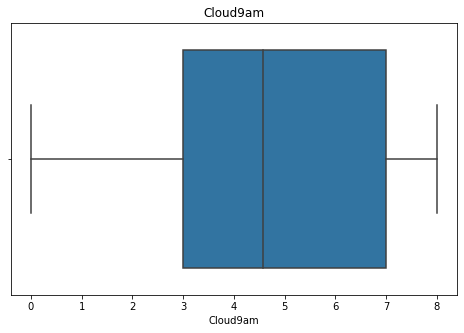

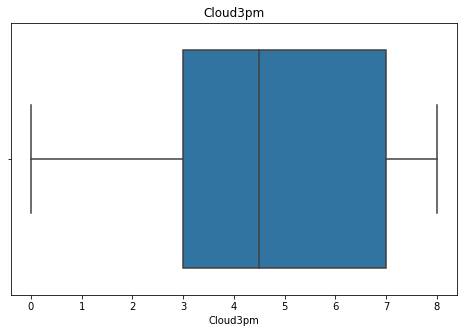

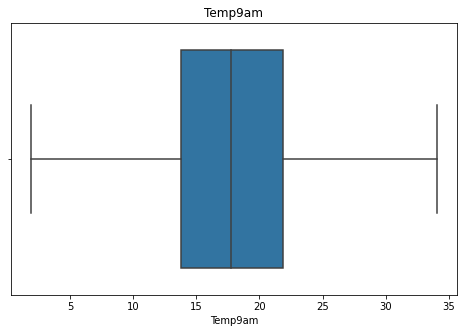

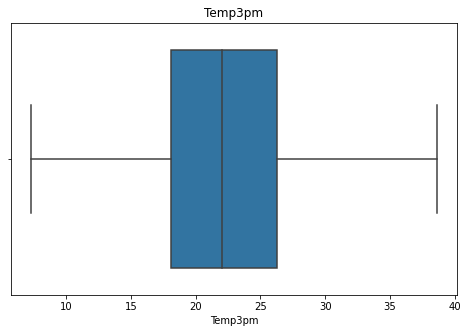

In [22]:
#checking for outliers after replacing them using IQR using Box Plot:

for feature in num_features:
    plt.figure(figsize=(8,5))
    sns.boxplot(df[feature])
    plt.title(feature)

- Outliers were removed from all the columns

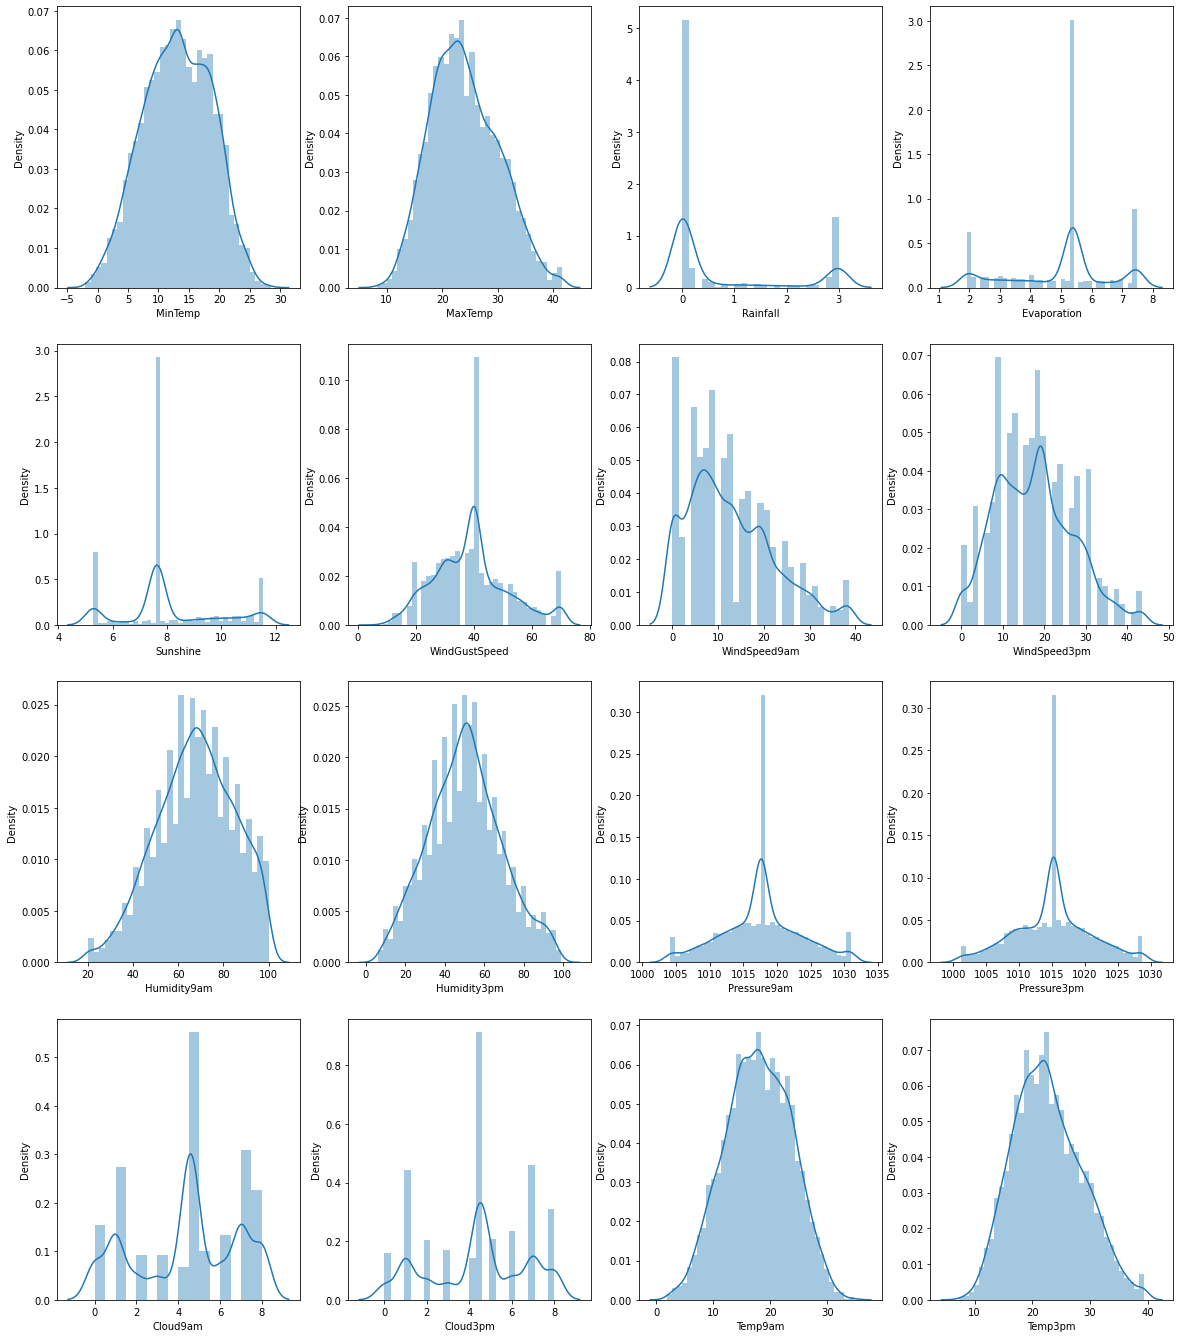

In [99]:
#Distribution of numerical columns after removing outliers

plt.figure(figsize= (20,30))  
pos = 1    
for feature in num_features:   
    plt.subplot(5, 4, pos)  
    sns.distplot(df[feature], kde= True ) #plotting distribution plot     
    pos += 1 

<Figure size 1440x576 with 0 Axes>

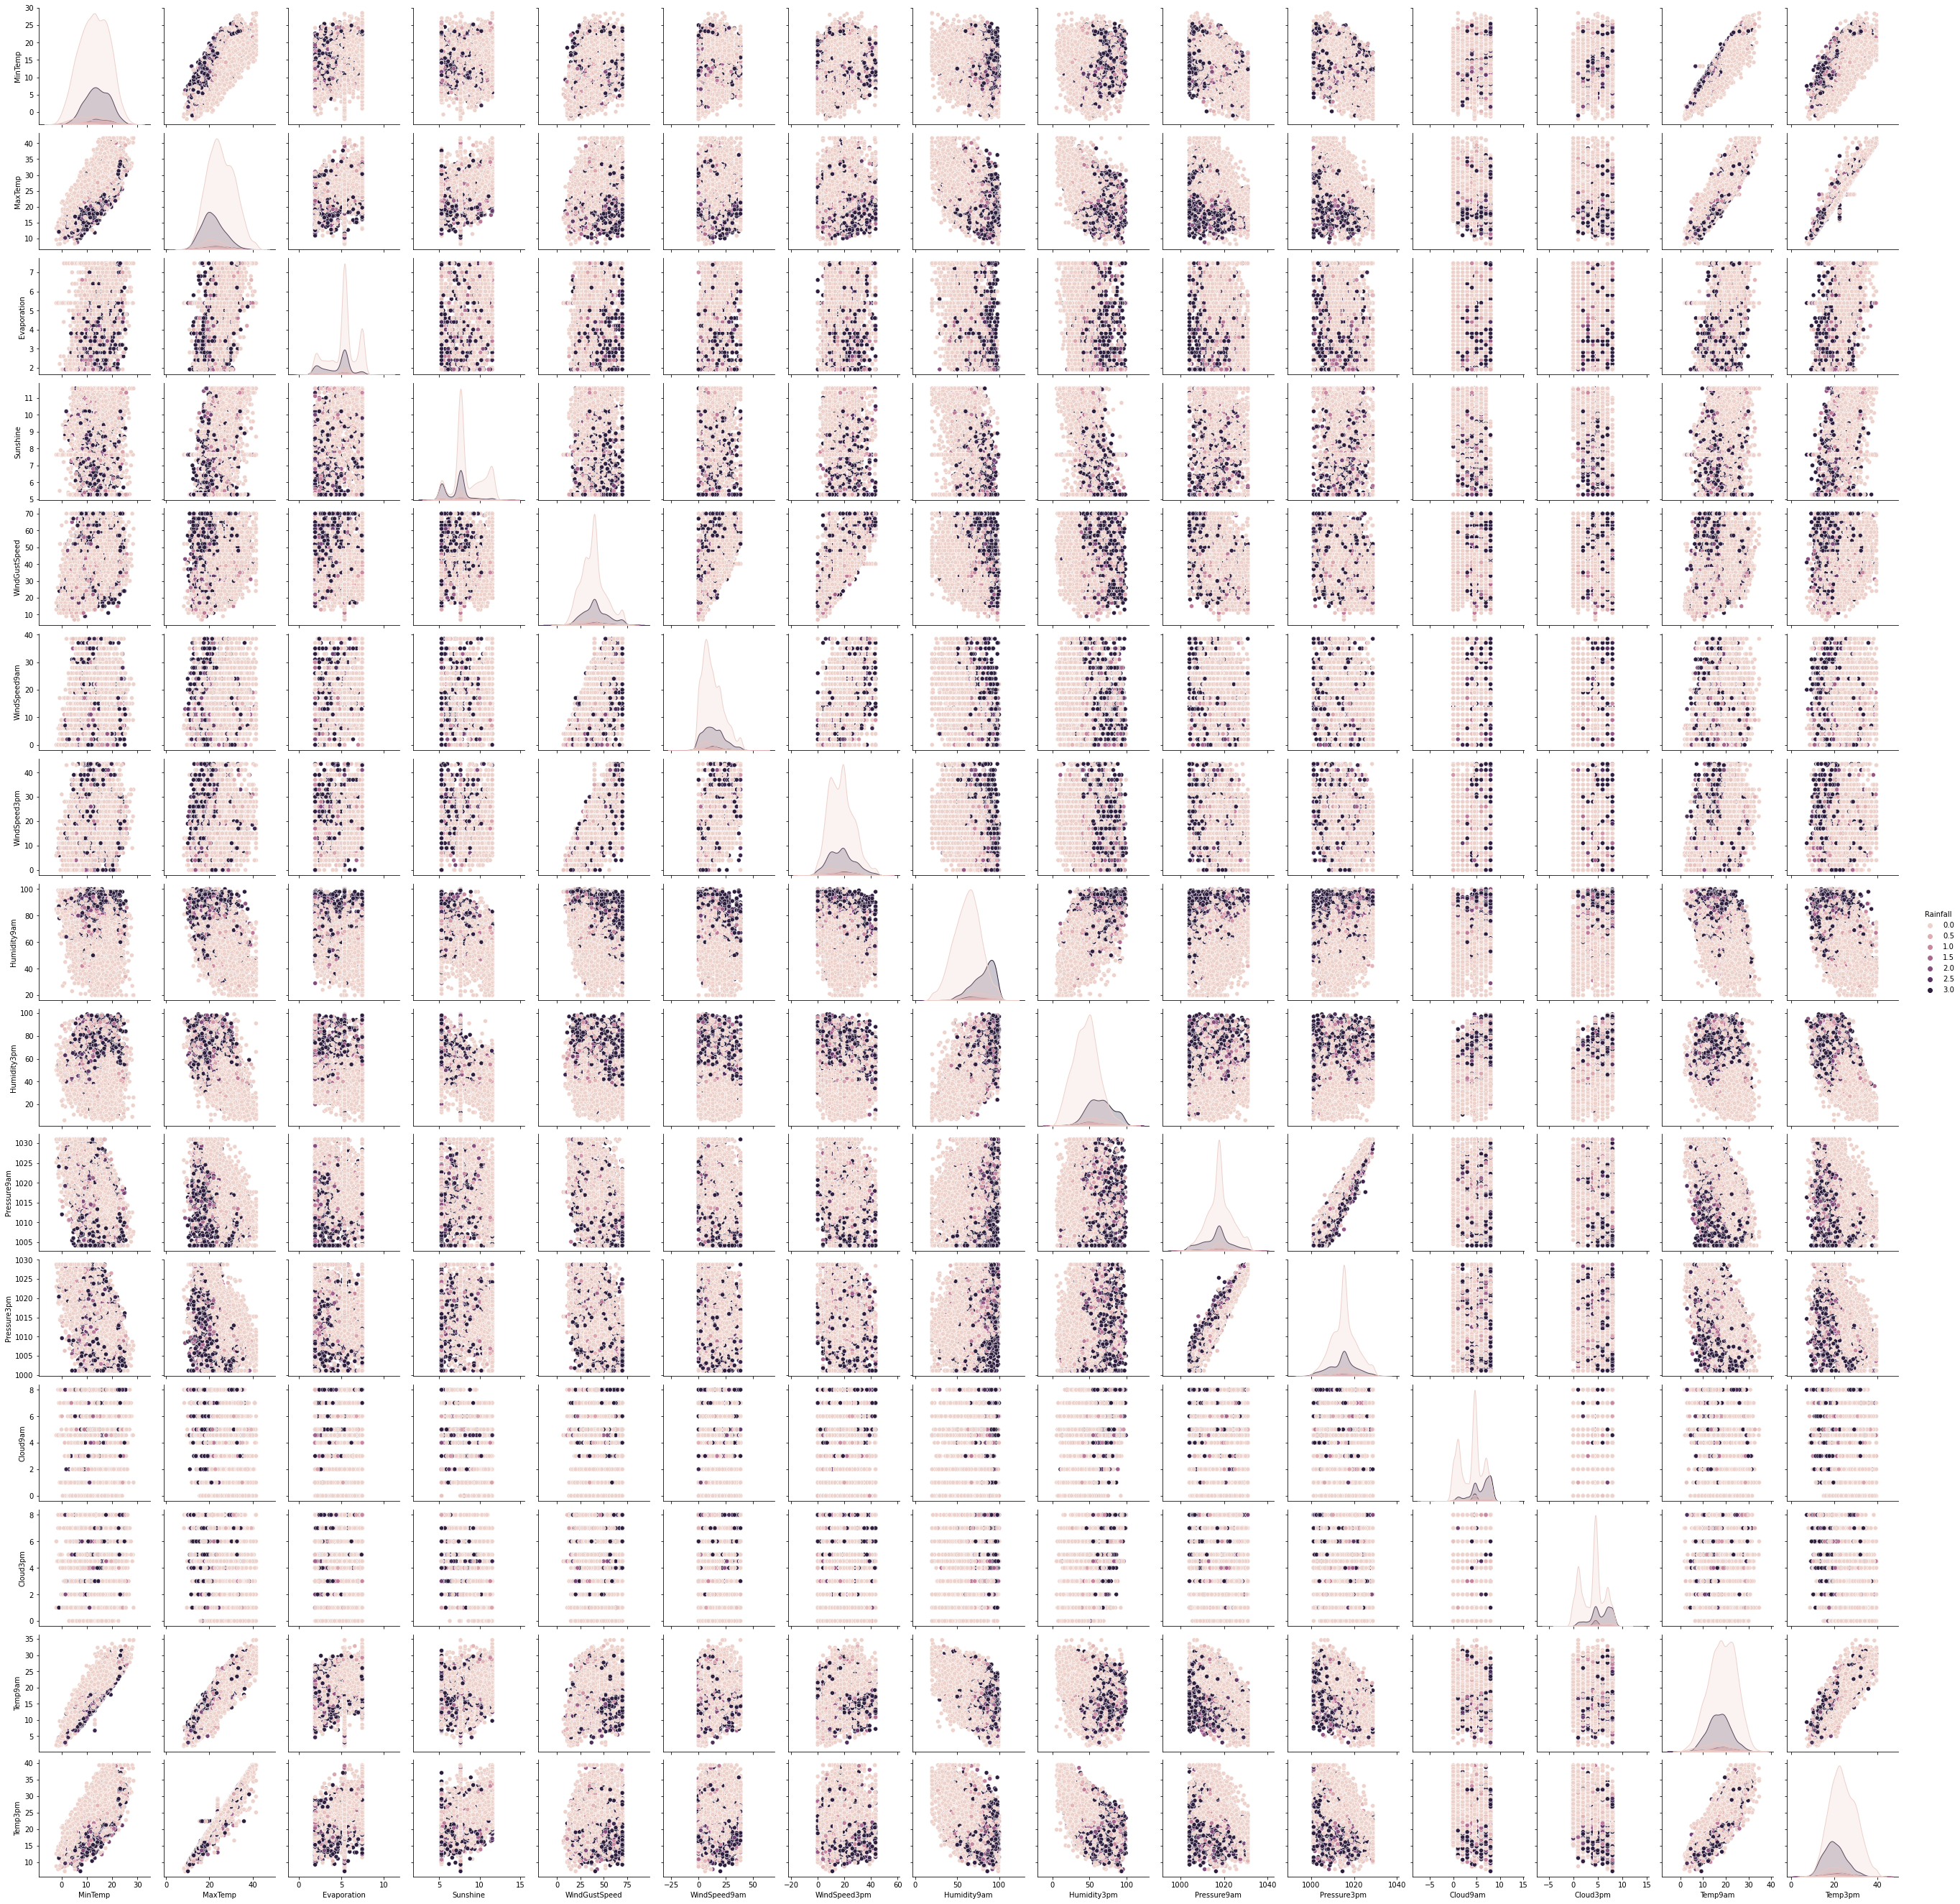

In [104]:
plt.figure(figsize=(20,8))
sns.pairplot(data=df, hue='Rainfall',diag_kind = 'kde')

In [106]:
# Correlation matrix

cor = df.corr()
cor

MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  \
MinTemp        1.000000  0.728413  0.093211     0.359282  0.104221   
MaxTemp        0.728413  1.000000 -0.224581     0.451595  0.384487   
Rainfall       0.093211 -0.224581  1.000000    -0.172052 -0.277817   
Evaporation    0.359282  0.451595 -0.172052     1.000000  0.349024   
Sunshine       0.104221  0.384487 -0.277817     0.349024  1.000000   
WindGustSpeed  0.249477  0.169997  0.105320     0.173912  0.036383   
WindSpeed9am   0.173190  0.057493  0.051280     0.087123  0.092027   
WindSpeed3pm   0.191155  0.118120  0.035961     0.090973  0.091881   
Humidity9am   -0.153796 -0.424456  0.404303    -0.279511 -0.426969   
Humidity3pm    0.067502 -0.430419  0.388644    -0.220414 -0.424541   
Pressure9am   -0.447951 -0.345996 -0.126664    -0.278520 -0.022112   
Pressure3pm   -0.446739 -0.421159 -0.050571    -0.292772 -0.085309   
Cloud9am       0.087812 -0.246716  0.314862    -0.080999 -0.573013   
Cloud3pm       0.040742 -0.243658  0.266933    -0.134855 -0.582138   
Temp9am        0.891459  0.867069 -0.086926     0.407446  0.304863   
Temp3pm        0.697220  0.974824 -0.235877     0.442157  0.402106   

               WindGustSpeed  WindSpeed9am  WindSpeed3pm  Humidity9am  \
MinTemp             0.249477      0.173190      0.191155    -0.153796   
MaxTemp             0.169997      0.057493      0.118120    -0.424456   
Rainfall            0.105320      0.051280      0.035961     0.404303   
Evaporation         0.173912      0.087123      0.090973    -0.279511   
Sunshine            0.036383      0.092027      0.091881    -0.426969   
WindGustSpeed       1.000000      0.586499      0.623566    -0.271315   
WindSpeed9am        0.586499      1.000000      0.554621    -0.376731   
WindSpeed3pm        0.623566      0.554621      1.000000    -0.261710   
Humidity9am        -0.271315     -0.376731     -0.261710     1.000000   
Humidity3pm        -0.095180     -0.120677     -0.100024     0.639693   
Pressure9am        -0.388311     -0.177537     -0.247863     0.140784   
Pressure3pm        -0.356595     -0.147726     -0.208725     0.179362   
Cloud9am            0.003561     -0.031367     -0.016775     0.419639   
Cloud3pm            0.050255      0.013706     -0.023340     0.321011   
Temp9am             0.228006      0.155022      0.210919    -0.406529   
Temp3pm             0.135117      0.042522      0.095346    -0.417770   

               Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  \
MinTemp           0.067502    -0.447951    -0.446739  0.087812  0.040742   
MaxTemp          -0.430419    -0.345996    -0.421159 -0.246716 -0.243658   
Rainfall          0.388644    -0.126664    -0.050571  0.314862  0.266933   
Evaporation      -0.220414    -0.278520    -0.292772 -0.080999 -0.134855   
Sunshine         -0.424541    -0.022112    -0.085309 -0.573013 -0.582138   
WindGustSpeed    -0.095180    -0.388311    -0.356595  0.003561  0.050255   
WindSpeed9am     -0.120677    -0.177537    -0.147726 -0.031367  0.013706   
WindSpeed3pm     -0.100024    -0.247863    -0.208725 -0.016775 -0.023340   
Humidity9am       0.639693     0.140784     0.179362  0.419639  0.321011   
Humidity3pm       1.000000    -0.003185     0.065613  0.423375  0.451996   
Pressure9am      -0.003185     1.000000     0.962725 -0.067097 -0.073887   
Pressure3pm       0.065613     0.962725     1.000000 -0.010947 -0.020557   
Cloud9am          0.423375    -0.067097    -0.010947  1.000000  0.596580   
Cloud3pm          0.451996    -0.073887    -0.020557  0.596580  1.000000   
Temp9am          -0.136971    -0.428319    -0.458243 -0.138617 -0.124713   
Temp3pm          -0.499845    -0.305480    -0.388599 -0.262384 -0.286666   

                Temp9am   Temp3pm  
MinTemp        0.891459  0.697220  
MaxTemp        0.867069  0.974824  
Rainfall      -0.086926 -0.235877  
Evaporation    0.407446  0.442157  
Sunshine       0.304863  0.402106  
WindGustSpeed  0.228006  0.135117  
WindSpeed9am   0.155022  0.042522  
Wi

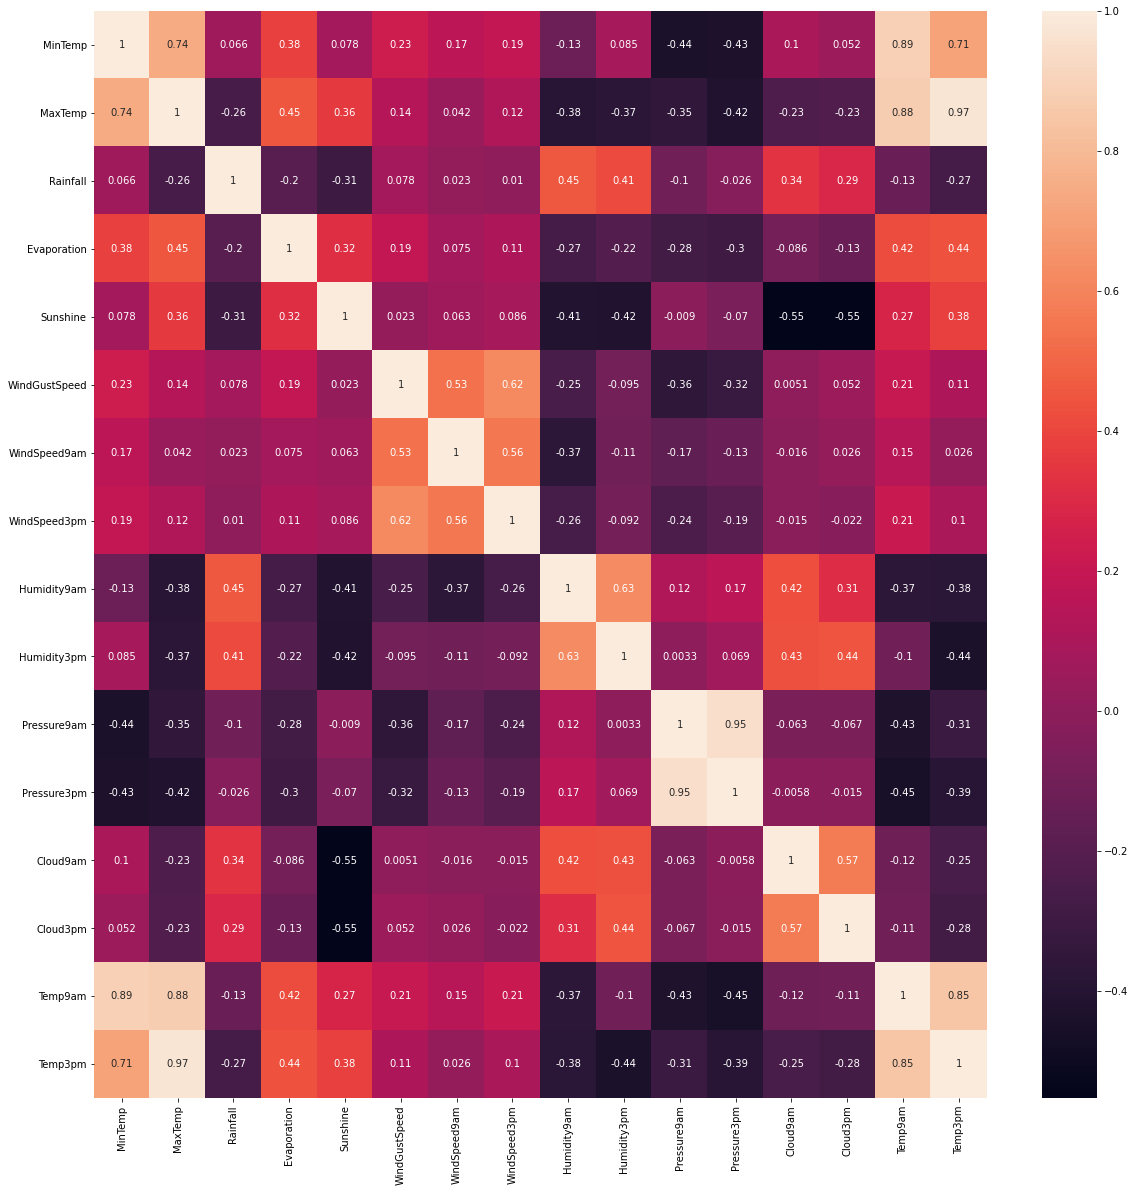

In [92]:
correlationmap = df.corr(method = "spearman")
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(correlationmap,annot=True)

- Nothing in this correlation heatmap is surprising
- Features with strong correlations (either positive or negative) have intuitive reasons

##### Data Processing
- Converting categorical data into numerical data

In [107]:
# There are many encoding techniques. We use label encoder to convert the categorical data into numerical data

from sklearn.preprocessing import LabelEncoder
def encode_column():
 for column in df.columns:
  if df[column].dtype== object:
     df[column] = LabelEncoder().fit_transform(df[column])

 return df.head()

In [108]:
encode_column()

Date  Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0     0         1     13.4     22.9       0.6     5.389395  7.632205   
1     1         1      7.4     25.1       0.0     5.389395  7.632205   
2     2         1     12.9     25.7       0.0     5.389395  7.632205   
3     3         1      9.2     28.0       0.0     5.389395  7.632205   
4     4         1     17.5     32.3       1.0     5.389395  7.632205   

   WindGustDir  WindGustSpeed  WindDir9am  ...  Humidity9am  Humidity3pm  \
0           13           44.0          13  ...         71.0         22.0   
1           14           44.0           6  ...         44.0         25.0   
2           15           46.0          13  ...         38.0         30.0   
3            4           24.0           9  ...         45.0         16.0   
4           13           41.0           1  ...         82.0         33.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1007.7       1007.1  8.000000  4.503183     16.9     21.8          0   
1       1010.6       1007.8  4.566622  4.503183     17.2     24.3          0   
2       1007.6       1008.7  4.566622  2.000000     21.0     23.2          0   
3       1017.6       1012.8  4.566622  4.503183     18.1     26.5          0   
4       1010.8       1006.0  7.000000  8.000000     17.8     29.7          0   

   RainTomorrow  
0             0  
1             0  
2             0  
3             0  
4             0  

[5 rows x 23 columns]

## Prediction with Rain Tomorrow

- We need to develop a model for predicting if its going to rain tomorrow or not by dropping "RainTomorrow" and "Date" columns as date column has nothing to do with the dataset

In [109]:
X = df.drop(['RainTomorrow','Date'], axis=1)
y = df['RainTomorrow']

### Splitting the data into train and test

In [159]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=80)

#### Standardising the data

- Data standardization is done by Standard-Scaler which scales the data so that Mean of observed data is 0 and Standard Deviation is 1.
- We are using standard scalar method on x

In [160]:
from sklearn.preprocessing import StandardScaler 

scaler = StandardScaler()
#fitting standardization on train data only
scaler.fit(x_train)
xtrainsc = scaler.transform(x_train)
xtestsc = scaler.transform(x_test)

### PCA

In [161]:
from sklearn.decomposition import PCA
n_components=15
pca = PCA(n_components=n_components)
pca.fit(xtrainsc)
XtrainPCA = pca.transform(xtrainsc)
XtestPCA = pca.transform(xtestsc)
XtrainPCA.shape

(5409, 15)

In [162]:
pca.explained_variance_ratio_

array([0.26517929, 0.15998844, 0.10607368, 0.07816448, 0.06467094,
       0.05360249, 0.04462912, 0.03863096, 0.03553884, 0.03053859,
       0.02434828, 0.02103733, 0.01869167, 0.01684709, 0.01508208])

In [163]:
PC = []
for i in range(1,n_components+1):
    PC.append('PC'+str(i))
    
pca_df = pd.DataFrame({'var':pca.explained_variance_ratio_, 'PC':PC})
plt.figure(figsize=(30,10))
sns.barplot(x='PC',y="var", data=pca_df, color="c")

<AxesSubplot:xlabel='PC', ylabel='var'>

### Building Models

In [172]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier 
from xgboost import XGBClassifier

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix ,f1_score
from sklearn.metrics import classification_report, roc_auc_score, recall_score, precision_score,roc_curve
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve, classification_report

In [174]:
def conf_matrix(model, xtestsc, y_test, cmap='Blues'):
    plot_confusion_matrix(model, xtestsc, y_test, cmap=cmap)
    plt.grid()
    plt.show()

def roc_curve(model, xtestsc, y_test):
    plot_roc_curve(model, xtestsc, y_test)
    plt.plot([0, 1], [0, 1], color='black', linestyle='--')
    plt.show()
    
def evaluate(model, xtrainsc, xtestsc, y_train, y_test, y_pred):
    # Confusion Matrix
    print('Confusion Matrix')
    print('-'*53)
    conf_matrix(model, xtestsc, y_test)
    print('\n') 
    
    # Classification Report
    print('Classification Report') 
    print('-'*53)
    print(classification_report(y_test, y_pred))
    print('\n')
    
    # ROC Curve
    print('ROC Curve')
    print('-'*53)
    roc_curve(model, xtestsc, y_test)
    print('\n')
    
    # Checking model fitness
    print('Checking model accuracy') 
    print('-'*53)
    print('Train score:', round(model.score(xtrainsc, y_train), 4))
    print('Test score: ', round(model.score(xtestsc, y_test), 4))
    print('\n')
    

******************************LOGISTIC REGRESSION******************************
Confusion Matrix
-----------------------------------------------------


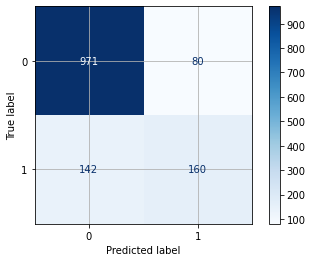



Classification Report
-----------------------------------------------------
              precision    recall  f1-score   support

           0       0.87      0.92      0.90      1051
           1       0.67      0.53      0.59       302

    accuracy                           0.84      1353
   macro avg       0.77      0.73      0.74      1353
weighted avg       0.83      0.84      0.83      1353



ROC Curve
-----------------------------------------------------


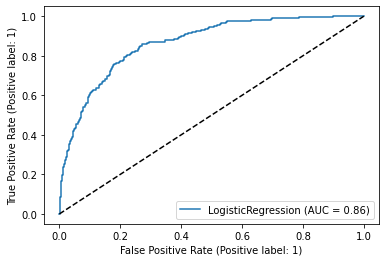



Checking model accuracy
-----------------------------------------------------
Train score: 0.8388
Test score:  0.8359




In [166]:
print('*'*30+"LOGISTIC REGRESSION"+'*'*30)
LR = LogisticRegression()
LR.fit(xtrainsc, y_train)
y_pred = LR.predict(xtestsc)
evaluate(LR, xtrainsc, xtestsc, y_train, y_test, y_pred)


#### Observations
- Decent performance for a baseline model
- The model is well fit, with both the train and test scores approximately the same

#### Correcting class imbalance

A class imbalance currently exists for the target variable. Correcting for this may help improve model performance. To do so, I will resample the training data using SMOTE.

In [152]:
from imblearn.over_sampling import SMOTE

In [153]:
x_resampled, y_resampled = SMOTE().fit_resample(x_train, y_train)

print('Original')
print('-'*20)
print(y_train.value_counts())
print('\n')
print('SMOTE')
print('-'*20)
print(pd.Series(y_resampled).value_counts())

Original
--------------------
0    4139
1    1270
Name: RainTomorrow, dtype: int64


SMOTE
--------------------
1    4139
0    4139
Name: RainTomorrow, dtype: int64


Confusion Matrix
-----------------------------------------------------


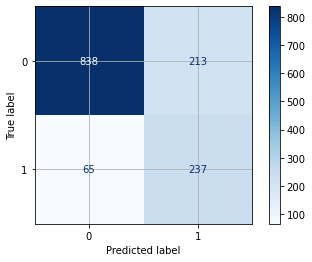



Classification Report
-----------------------------------------------------
              precision    recall  f1-score   support

           0       0.93      0.80      0.86      1051
           1       0.53      0.78      0.63       302

    accuracy                           0.79      1353
   macro avg       0.73      0.79      0.74      1353
weighted avg       0.84      0.79      0.81      1353



ROC Curve
-----------------------------------------------------


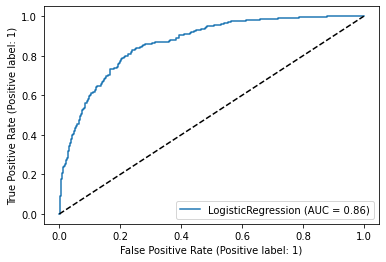



Checking model accuracy
-----------------------------------------------------
Train score: 0.7867
Test score:  0.7945




In [155]:
logreg_smote = LogisticRegression(random_state=42)
logreg_smote.fit(x_resampled, y_resampled)
y_pred_smote = logreg_smote.predict(x_test)
evaluate(logreg_smote,x_resampled, x_test, y_resampled, y_test, y_pred_smote)


#### Observations
- The accuracy of this model sharply decreased
- This model remains well fit but scores for both the train and test sets decreased
- Contrary to my initial thoughts, using SMOTE actually had worse performance and will not be utilized in subsequent iterations

#### Performing Hyperparameter tuning on Logistic Regression

In [136]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

In [156]:
LR_T=LogisticRegression()
#define parameters
parameters = {'C': [1, 1e8, 1e16],
    'fit_intercept': [True, False],
    'max_iter': [50, 100, 150],
    'random_state': [42]}

#define grid search

cv=RepeatedStratifiedKFold(n_splits=10,n_repeats=3,random_state=1)
grid_search=GridSearchCV(estimator=LR_T,cv=cv,param_grid=parameters,
                         refit='roc_auc', scoring=['accuracy', 'roc_auc'], n_jobs=-1)
grid_result=grid_search.fit(X,y)
print("Best Parameters: ", grid_result.best_params_)
print("Best AUC-ROC : ", grid_search.best_score_)

Best Parameters:  {'C': 1e+16, 'fit_intercept': True, 'max_iter': 150, 'random_state': 42}
Best AUC-ROC :  0.8602203283737421


******************************LOGISTIC REGRESSION AFTER TUNED******************************
Confusion Matrix
-----------------------------------------------------


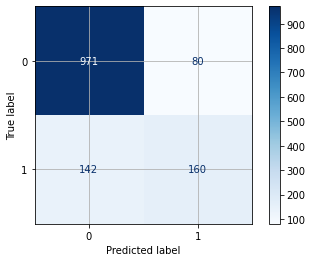



Classification Report
-----------------------------------------------------
              precision    recall  f1-score   support

           0       0.87      0.92      0.90      1051
           1       0.67      0.53      0.59       302

    accuracy                           0.84      1353
   macro avg       0.77      0.73      0.74      1353
weighted avg       0.83      0.84      0.83      1353



ROC Curve
-----------------------------------------------------


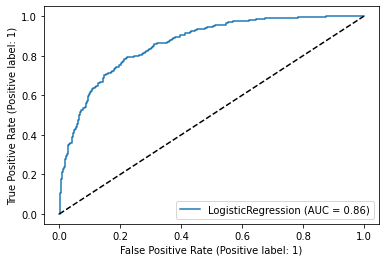



Checking model accuracy
-----------------------------------------------------
Train score: 0.838
Test score:  0.8359




In [168]:
print('*'*30+"LOGISTIC REGRESSION AFTER TUNED"+'*'*30)
LR_T = LogisticRegression(C=1e+16,fit_intercept=True,max_iter=150, random_state=42)
LR_T.fit(xtrainsc, y_train)
y_pred = LR_T.predict(xtestsc)
evaluate(LR_T, xtrainsc, xtestsc, y_train, y_test, y_pred)

- After tuning the model, the accuracy of the logistic regression model has changed very slightly but neither improved nor reduced.

******************************K NEIGHBORS CLASSIFIER******************************
Confusion Matrix
-----------------------------------------------------


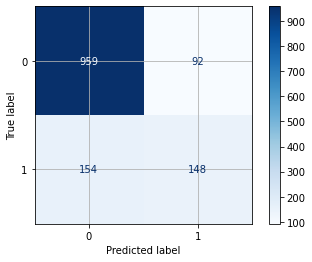



Classification Report
-----------------------------------------------------
              precision    recall  f1-score   support

           0       0.86      0.91      0.89      1051
           1       0.62      0.49      0.55       302

    accuracy                           0.82      1353
   macro avg       0.74      0.70      0.72      1353
weighted avg       0.81      0.82      0.81      1353



ROC Curve
-----------------------------------------------------


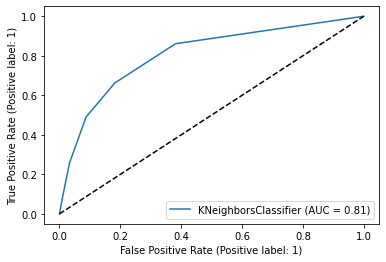



Checking model accuracy
-----------------------------------------------------
Train score: 0.878
Test score:  0.8182




In [146]:
print('*'*30+"K NEIGHBORS CLASSIFIER"+'*'*30)
KNN = KNeighborsClassifier()
KNN.fit(xtrainsc, y_train)
y_pred = KNN.predict(xtestsc)
evaluate(KNN, xtrainsc, xtestsc, y_train, y_test, y_pred)


******************************DECISION TREE CLASSIFIER******************************
Confusion Matrix
-----------------------------------------------------


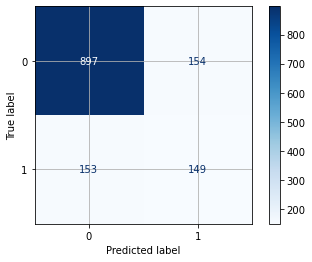



Classification Report
-----------------------------------------------------
              precision    recall  f1-score   support

           0       0.85      0.85      0.85      1051
           1       0.49      0.49      0.49       302

    accuracy                           0.77      1353
   macro avg       0.67      0.67      0.67      1353
weighted avg       0.77      0.77      0.77      1353



ROC Curve
-----------------------------------------------------


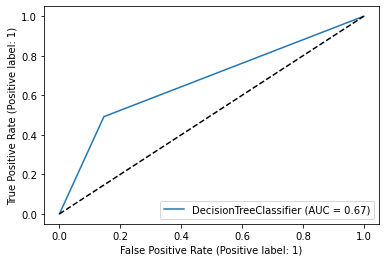



Checking model accuracy
-----------------------------------------------------
Train score: 0.9998
Test score:  0.7731




In [147]:
print('*'*30+"DECISION TREE CLASSIFIER"+'*'*30)
DT = DecisionTreeClassifier()
DT.fit(xtrainsc, y_train)
y_pred = DT.predict(xtestsc)
evaluate(DT, xtrainsc, xtestsc, y_train, y_test, y_pred)


#### Performing Hyperparameter tuning on Decision tree classifier

In [158]:
DT_T=DecisionTreeClassifier()
#define parameters
parameters = {'criterion': ['gini', 'entropy'],
    'max_depth': [3, 7, 11],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 3, 5],
    'random_state': [42]}

#define grid search

cv=RepeatedStratifiedKFold(n_splits=10,n_repeats=3,random_state=1)
grid_search=GridSearchCV(estimator=DT_T,cv=cv,param_grid=parameters,
                         refit='roc_auc', scoring=['accuracy', 'roc_auc'], n_jobs=-1)
grid_result=grid_search.fit(X,y)
print("Best Parameters: ", grid_result.best_params_)
print("Best AUC-ROC : ", grid_search.best_score_)

Best Parameters:  {'criterion': 'entropy', 'max_depth': 7, 'min_samples_leaf': 5, 'min_samples_split': 2, 'random_state': 42}
Best AUC-ROC :  0.8183663572288202


******************************DECISION TREE AFTER TUNED******************************
Confusion Matrix
-----------------------------------------------------


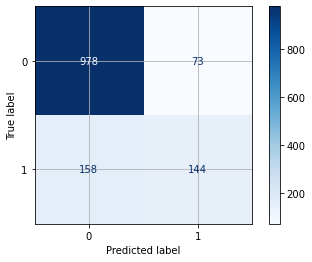



Classification Report
-----------------------------------------------------
              precision    recall  f1-score   support

           0       0.86      0.93      0.89      1051
           1       0.66      0.48      0.55       302

    accuracy                           0.83      1353
   macro avg       0.76      0.70      0.72      1353
weighted avg       0.82      0.83      0.82      1353



ROC Curve
-----------------------------------------------------


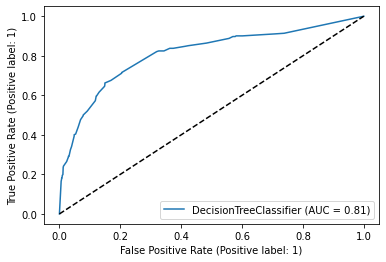



Checking model accuracy
-----------------------------------------------------
Train score: 0.8573
Test score:  0.8293




In [169]:
print('*'*30+"DECISION TREE AFTER TUNED"+'*'*30)
DT_T = DecisionTreeClassifier(criterion='entropy',max_depth=7,min_samples_leaf=5,min_samples_split=2, random_state=42)
DT_T.fit(xtrainsc, y_train)
y_pred = DT_T.predict(xtestsc)
evaluate(DT_T, xtrainsc, xtestsc, y_train, y_test, y_pred)

#### Observations
- Solid increases in the evaluation metrics
- The tuned model is much better fit than the baseline model

******************************RANDOM FOREST CLASSIFIER******************************
Confusion Matrix
-----------------------------------------------------


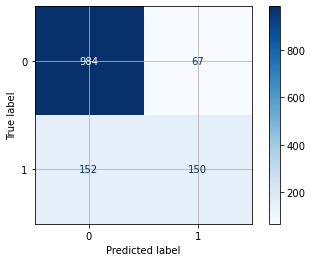



Classification Report
-----------------------------------------------------
              precision    recall  f1-score   support

           0       0.87      0.94      0.90      1051
           1       0.69      0.50      0.58       302

    accuracy                           0.84      1353
   macro avg       0.78      0.72      0.74      1353
weighted avg       0.83      0.84      0.83      1353



ROC Curve
-----------------------------------------------------


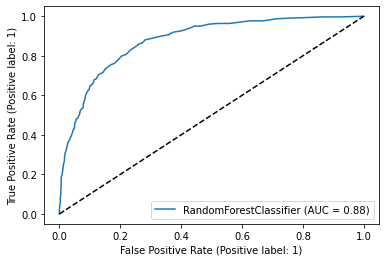



Checking model accuracy
-----------------------------------------------------
Train score: 0.9998
Test score:  0.8381




In [148]:
print('*'*30+"RANDOM FOREST CLASSIFIER"+'*'*30)
RF = RandomForestClassifier()
RF.fit(xtrainsc, y_train)
y_pred = RF.predict(xtestsc)
evaluate(RF, xtrainsc, xtestsc, y_train, y_test, y_pred)


#### Performing Hyperparameter tuning on Random forest classifier

In [170]:
RF_T=RandomForestClassifier()
#define parameters
parameters = {'n_estimators': [10, 35, 100],
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 7, 11],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 3, 5],
    'random_state': [42]}

#define grid search

cv=RepeatedStratifiedKFold(n_splits=10,n_repeats=3,random_state=1)
grid_search=GridSearchCV(estimator=RF_T,cv=cv,param_grid=parameters,
                         refit='roc_auc', scoring=['accuracy', 'roc_auc'], n_jobs=-1)
grid_result=grid_search.fit(X,y)
print("Best Parameters: ", grid_result.best_params_)
print("Best AUC-ROC : ", grid_search.best_score_)

Best Parameters:  {'criterion': 'entropy', 'max_depth': 11, 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 100, 'random_state': 42}
Best AUC-ROC :  0.8721533447659167


******************************RANDOM FOREST AFTER TUNED******************************
Confusion Matrix
-----------------------------------------------------


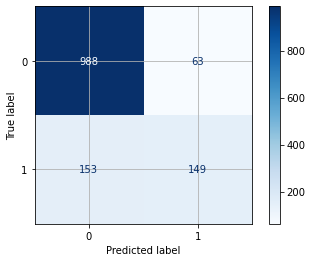



Classification Report
-----------------------------------------------------
              precision    recall  f1-score   support

           0       0.87      0.94      0.90      1051
           1       0.70      0.49      0.58       302

    accuracy                           0.84      1353
   macro avg       0.78      0.72      0.74      1353
weighted avg       0.83      0.84      0.83      1353



ROC Curve
-----------------------------------------------------




Checking model accuracy
-----------------------------------------------------
Train score: 0.9065
Test score:  0.8404




In [171]:
print('*'*30+"RANDOM FOREST AFTER TUNED"+'*'*30)
RF_T = RandomForestClassifier(n_estimators=100,
                              criterion='entropy',max_depth=11,min_samples_leaf=5,min_samples_split=2, random_state=42)
RF_T.fit(xtrainsc, y_train)
y_pred = RF_T.predict(xtestsc)
evaluate(RF_T, xtrainsc, xtestsc, y_train, y_test, y_pred)

#### Observations
- The accuracy score remained roughly the same while the F1 score also remained same
- Furthermore, the tuned model has a much better fit than the baseline model

******************************GAUSSIAN NB******************************
Confusion Matrix
-----------------------------------------------------


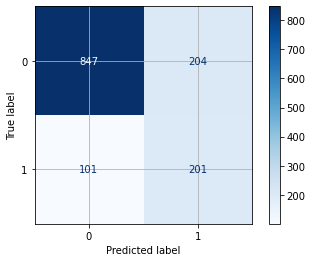



Classification Report
-----------------------------------------------------
              precision    recall  f1-score   support

           0       0.89      0.81      0.85      1051
           1       0.50      0.67      0.57       302

    accuracy                           0.77      1353
   macro avg       0.69      0.74      0.71      1353
weighted avg       0.80      0.77      0.79      1353



ROC Curve
-----------------------------------------------------


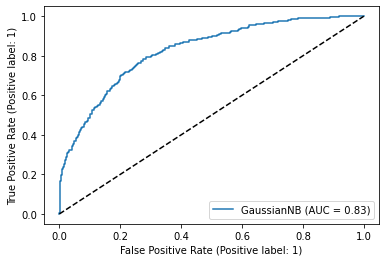



Checking model accuracy
-----------------------------------------------------
Train score: 0.7839
Test score:  0.7746




In [149]:
print('*'*30+"GAUSSIAN NB"+'*'*30)
GNB = GaussianNB()
GNB.fit(xtrainsc, y_train)
y_pred = GNB.predict(xtestsc)
evaluate(GNB, xtrainsc, xtestsc, y_train, y_test, y_pred)


******************************ADA BOOST CLASSIFIER******************************
Confusion Matrix
-----------------------------------------------------


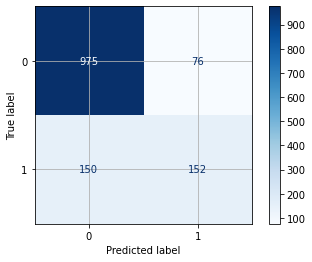



Classification Report
-----------------------------------------------------
              precision    recall  f1-score   support

           0       0.87      0.93      0.90      1051
           1       0.67      0.50      0.57       302

    accuracy                           0.83      1353
   macro avg       0.77      0.72      0.73      1353
weighted avg       0.82      0.83      0.82      1353



ROC Curve
-----------------------------------------------------


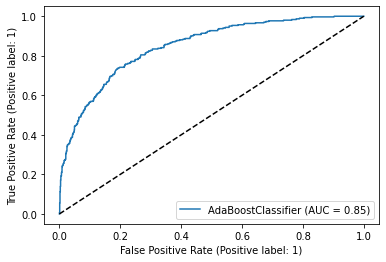



Checking model accuracy
-----------------------------------------------------
Train score: 0.8506
Test score:  0.833




In [150]:
print('*'*30+"ADA BOOST CLASSIFIER"+'*'*30)
AB=AdaBoostClassifier()
AB.fit(xtrainsc, y_train)
y_pred = AB.predict(xtestsc)
evaluate(AB, xtrainsc, xtestsc, y_train, y_test, y_pred)


******************************XGBOOST******************************
Confusion Matrix
-----------------------------------------------------


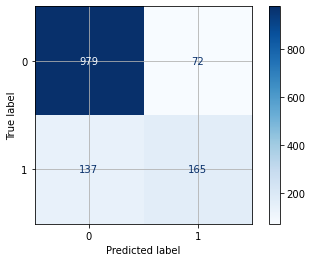



Classification Report
-----------------------------------------------------
              precision    recall  f1-score   support

           0       0.88      0.93      0.90      1051
           1       0.70      0.55      0.61       302

    accuracy                           0.85      1353
   macro avg       0.79      0.74      0.76      1353
weighted avg       0.84      0.85      0.84      1353



ROC Curve
-----------------------------------------------------


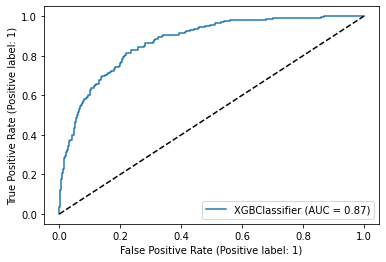



Checking model accuracy
-----------------------------------------------------
Train score: 0.9943
Test score:  0.8455




In [186]:
print('*'*30+"XGBOOST"+'*'*30)
XGB = XGBClassifier()
XGB.fit(xtrainsc, y_train)
y_pred = XGB.predict(xtestsc)
evaluate(XGB, xtrainsc, xtestsc, y_train, y_test, y_pred)

#### Observations
- This model is definitely best fit

#### Performing Hyperparameter tuning on XgBoost classifier

In [177]:
XGB_T=XGBClassifier()
#define parameters
parameters = {'n_estimators': [10, 35, 100],
    'max_depth': [5, 10, 15],
    'learning_rate': [0.01, 0.1, 0.25]}

#define grid search

cv=RepeatedStratifiedKFold(n_splits=10,n_repeats=3,random_state=1)
grid_search=GridSearchCV(estimator=XGB_T,cv=cv,param_grid=parameters,
                         refit='roc_auc', scoring=['accuracy', 'roc_auc'], n_jobs=-1)
grid_result=grid_search.fit(X,y)
print("Best Parameters: ", grid_result.best_params_)
print("Best AUC-ROC : ", grid_search.best_score_)

Best Parameters:  {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}
Best AUC-ROC :  0.8739400082469121


******************************XGBOOST AFTER TUNED******************************
Confusion Matrix
-----------------------------------------------------


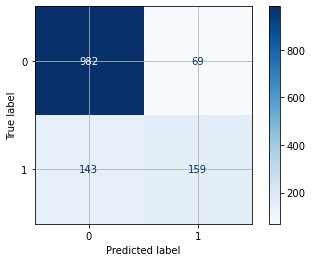



Classification Report
-----------------------------------------------------
              precision    recall  f1-score   support

           0       0.87      0.93      0.90      1051
           1       0.70      0.53      0.60       302

    accuracy                           0.84      1353
   macro avg       0.79      0.73      0.75      1353
weighted avg       0.83      0.84      0.84      1353



ROC Curve
-----------------------------------------------------


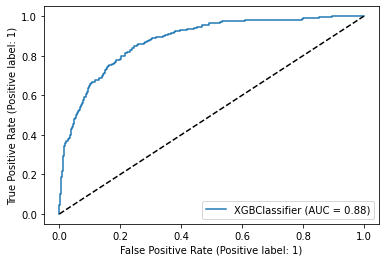



Checking model accuracy
-----------------------------------------------------
Train score: 0.9151
Test score:  0.8433




In [178]:
print('*'*30+"XGBOOST AFTER TUNED"+'*'*30)
XGB_T = XGBClassifier(n_estimators=100,
                              max_depth=5,learning_rate=0.1)
XGB_T.fit(xtrainsc, y_train)
y_pred = XGB_T.predict(xtestsc)
evaluate(XGB_T, xtrainsc, xtestsc, y_train, y_test, y_pred)

### Compare performances of all the models

In [183]:
summary = pd.DataFrame({'Model' : ['Logistic Regression','LR after smote','LR after tuned','KNeigbor','Decision Tree',
                                   'DT after tuned','Random Forest','RF after tuned',
                                   'Gaussian NB','Ada Boost','XGB classifier','XGB after tuned'],
                      'Accuracy Score': [0.8359,0.7945,0.8359,0.8182,0.7731,0.8293,0.8381,0.8404,0.7746,0.833,0.8455,0.8433]})
summary.sort_values(by='Accuracy Score',ascending=False)

Model  Accuracy Score
10       XGB classifier          0.8455
11      XGB after tuned          0.8433
7        RF after tuned          0.8404
6         Random Forest          0.8381
0   Logistic Regression          0.8359
2        LR after tuned          0.8359
9             Ada Boost          0.8330
5        DT after tuned          0.8293
3              KNeigbor          0.8182
1        LR after smote          0.7945
8           Gaussian NB          0.7746
4         Decision Tree          0.7731

### Saving the model - Prediction with Rain Tomorrow

In [184]:
import pickle
filename = 'weatherraintmrw.pkl'
pickle.dump(XGB, open(filename, 'wb'))

In [187]:
model=pickle.load(open('weatherraintmrw.pkl','rb'))
result=model.score(xtestsc,y_test)
print(result*100)

84.5528455284553


In [191]:
conclusion=pd.DataFrame([model.predict(xtestsc)[:],y_pred[:]],index=['Predicted','Original'])

In [192]:
conclusion

0     1     2     3     4     5     6     7     8     9     ...  \
Predicted     0     1     0     0     0     0     0     0     1     0  ...   
Original      0     1     0     0     0     0     0     0     1     0  ...   

           1343  1344  1345  1346  1347  1348  1349  1350  1351  1352  
Predicted     0     1     0     0     0     0     0     0     1     0  
Original      0     1     0     0     0     0     0     0     1     0  

[2 rows x 1353 columns]

## Prediction with Rainfall

- We are dropping the target variable 'Rainfall' for building the models and 'Date' column as it has nothing to do with models building.

In [193]:
x = df.drop(['Rainfall','Date'], axis=1)
y = df['Rainfall']

#### Splitting the data into train and test

In [216]:
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=80,test_size=0.20)

In [195]:
from sklearn.linear_model import LinearRegression 
from sklearn.ensemble import RandomForestRegressor 
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.tree import DecisionTreeRegressor 
from sklearn.linear_model import Ridge 
from sklearn.linear_model import Lasso
from sklearn.svm import SVR 
import sklearn.metrics as metrics
from sklearn.metrics import mean_squared_error, r2_score,accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

#### Building the models

In [196]:
#Defining a function to check the scores of the models
def evaluate_model(model, x_train, x_test, y_train, y_test): 
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)

    #Calculating Details
    model_train_acc = round(model.score(x_train, y_train) * 100, 2)
    model_test_acc= round(model.score(x_test, y_test) * 100, 2)
    print('Train Score is : ', model_train_acc)
    print('Test Score is : ' , model_test_acc)
    #Calculating Prediction
    print('R2 Score:',r2_score(y_test, y_pred))
    print('MSE:',mean_squared_error(y_test, y_pred))
    print("RMSE: ",mean_squared_error(y_test, y_pred, squared=False))
    

In [198]:
print("==========LINEAR REGRESSION===========")
LinReg = LinearRegression()
evaluate_model(LinReg,x_train,x_test,y_train,y_test)

==========LINEAR REGRESSION===========
Train Score is :  83.15
Test Score is :  85.06
R2 Score: 0.8505699558931642
MSE: 0.2230697707910914
RMSE:  0.47230262628011227


In [201]:
print("==========K NEIGHBORS REGRESSOR===========")
knn=KNeighborsRegressor()
evaluate_model(knn,x_train, x_test, y_train, y_test)

==========K NEIGHBORS REGRESSOR===========
Train Score is :  51.66
Test Score is :  31.48
R2 Score: 0.3147663075533358
MSE: 1.022919611822681
RMSE:  1.011394884218168


##### Hyperparameter tuning on K neighbors 

In [210]:
parameters={"n_neighbors":[3,4,5,6,7,8,9,10],"metric":["minkowski","euclidean","manhattan","chebyshev"],
            "weights":["uniform","distance"]}
gridsearch=GridSearchCV(estimator=knn,param_grid=parameters)
gridsearch.fit(x_train,y_train)
gridsearch.best_params_

{'metric': 'manhattan', 'n_neighbors': 10, 'weights': 'distance'}

In [211]:
knn_tuned=KNeighborsRegressor(metric='manhattan',n_neighbors=10,weights='distance')
evaluate_model(knn_tuned,x_train, x_test, y_train, y_test)

Train Score is :  99.91
Test Score is :  41.49
R2 Score: 0.4149163374849859
MSE: 0.8734152443769903
RMSE:  0.9345668752834065


- After tuning k neighbors classifier, R2 score has increased but the score is very less. It indicates that this model doesn't fit for this dataset

In [202]:
print("==========DECISION TREE REGRESSOR===========")
dt=DecisionTreeRegressor()
evaluate_model(dt,x_train, x_test, y_train, y_test)

==========DECISION TREE REGRESSOR===========
Train Score is :  99.91
Test Score is :  70.73
R2 Score: 0.7073004551130478
MSE: 0.4369430577287926
RMSE:  0.6610166849095358


In [203]:
print("==========RANDOM FOREST REGRESSOR===========")
rf=RandomForestRegressor()
evaluate_model(rf,x_train, x_test, y_train, y_test)

==========RANDOM FOREST REGRESSOR===========
Train Score is :  97.8
Test Score is :  84.9
R2 Score: 0.8490283326859281
MSE: 0.22537111211465077
RMSE:  0.47473267437016675


##### Hyperparameter tuning on Random forest model

In [208]:
parameters={'n_estimators':[100,200,300,1000],
           'max_features':['auto','sqrt'],
           'min_samples_split':[2,5,10],
           'min_samples_leaf':[1,2,4]}
rf_random=GridSearchCV(estimator=rf,param_grid=parameters,cv=3,n_jobs=-1)
rf_random.fit(x_train,y_train)
rf_random.best_params_

{'max_features': 'auto',
 'min_samples_leaf': 4,
 'min_samples_split': 5,
 'n_estimators': 1000}

In [209]:
rf_tuned=RandomForestRegressor(max_features='auto',min_samples_leaf=4,min_samples_split=5,n_estimators=1000)
evaluate_model(rf_tuned,x_train, x_test, y_train, y_test)

Train Score is :  93.46
Test Score is :  85.33
R2 Score: 0.8532757175738294
MSE: 0.21903059887269336
RMSE:  0.4680070500245625


- After tuning the random forest model, R2 score has slightly increased

In [204]:
print("==========RIDGE REGRESSOR===========")
ri=Ridge()
evaluate_model(ri,x_train, x_test, y_train, y_test)

==========RIDGE REGRESSOR===========
Train Score is :  83.15
Test Score is :  85.05
R2 Score: 0.8505336642463487
MSE: 0.2231239471074081
RMSE:  0.4723599761912604


In [205]:
print("==========LASSO REGRESSOR===========")
la=Lasso()
evaluate_model(la,x_train, x_test, y_train, y_test)

==========LASSO REGRESSOR===========
Train Score is :  22.58
Test Score is :  23.43
R2 Score: 0.23433482160517694
MSE: 1.1429880575096478
RMSE:  1.0691061956183996


In [207]:
print("==========SUPPORT VECTOR===========")
svm=SVR()
evaluate_model(svm,x_train, x_test, y_train, y_test)

==========SUPPORT VECTOR===========
Train Score is :  -12.43
Test Score is :  -14.45
R2 Score: -0.14445009133273623
MSE: 1.7084396988661432
RMSE:  1.3070729508585752


- Lasso Regression and Support vector machines doesn't fit for building the model to predict rainfall

### Compare performances of all the models

In [213]:
summary = pd.DataFrame({'Model' : ['Linear Regression','Kneigbor','Kneighbour tuned','Decision Tree',
                                   'Random Forest','Random forest tuned','Ridge',
                                   'Lasso','SVM'],
                      'R Square': [0.8505,0.314,0.414,0.707,0.849,0.8532,0.8505,0.234,-0.144],
                      'Mean Square Error' : [0.223,1.022,0.87,0.436,0.225,0.219,0.2231,1.14,1.70]})
summary.sort_values(by='R Square',ascending=False)

Model  R Square  Mean Square Error
5  Random forest tuned    0.8532             0.2190
0    Linear Regression    0.8505             0.2230
6                Ridge    0.8505             0.2231
4        Random Forest    0.8490             0.2250
3        Decision Tree    0.7070             0.4360
2     Kneighbour tuned    0.4140             0.8700
1             Kneigbor    0.3140             1.0220
7                Lasso    0.2340             1.1400
8                  SVM   -0.1440             1.7000

- From the above analysis, Random Forest after tuning model has the highest R2 score. So, the best fit model is RandomForest

### Saving the model - Prediction with Rainfall

In [214]:
import pickle
filename = 'weatherrainfall.pkl'
pickle.dump(rf_tuned, open(filename, 'wb'))

In [219]:
model=pickle.load(open('weatherrainfall.pkl','rb'))
result=model.score(x_test,y_test)
print(result*100)

85.32757175738294


In [220]:
conclusion=pd.DataFrame([model.predict(x_test)[:],y_pred[:]],index=['Predicted','Original'])

In [221]:
conclusion

0         1        2         3         4         5     \
Predicted  0.291031  2.714704  2.55702  0.015129  0.031762  0.068068   
Original   0.000000  1.000000  0.00000  0.000000  0.000000  0.000000   

               6         7         8         9     ...      1343      1344  \
Predicted  0.015753  0.228446  2.889914  0.027948  ...  0.521933  2.503476   
Original   0.000000  0.000000  1.000000  0.000000  ...  0.000000  1.000000   

               1345      1346      1347      1348      1349      1350  \
Predicted  2.803408  0.051354  0.262235  0.100256  0.145961  0.103939   
Original   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

              1351     1352  
Predicted  2.71456  0.03134  
Original   1.00000  0.00000  

[2 rows x 1353 columns]